#### EDA

In [96]:
## preprocessing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import datetime

## feature selection 
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

##training and testing split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## visulization
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling Training
#####Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV,BayesianRidge
import statsmodels.api as sm

import catboost
from catboost import Pool, CatBoostRegressor

#####Classification

from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## Model Evaluation
####Regression
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

###classification








%matplotlib inline

In [2]:
df = pd.read_csv('/Users/wofibgf/Downloads/9656465-1633813001061.csv')
#names,delimiter,index_col, low_memory = False

In [3]:
df.head()

,unitid,auditid,client,city,state,zipcode,region,frequency,dealerid,year,...,intrans_p,unitfloordayperc,floorday_deviation,flooramount,net_amount,cs_status,cs_dealer_change,request_dt,response_dt,carstory_hit
0,24391CA1-B936-41BC-AE53-52713072E7F9,9780869C-046B-4469-86E6-9878D004887F,SETF,CUMMING,GA,30041,Southeast,180,4B1DB489-8266-489B-83D0-41456A1D197F,NaN,...,0.0178,0.375,-5,25610.0,0,listing,NaN,7/17/21,7/18/21,listing
1,FDBE5EF3-B71F-4F20-B4B2-27102321A877,9481869C-046B-4469-86E6-9878D004887F,SETF,WEST COLUMBIA,SC,29169,Southeast,0,1ED61E98-9D78-406B-B470-A6849AFB446F,NaN,...,0.0400,9.000,8,39013.2,0,listing,NaN,6/28/21,6/29/21,listing
2,FDBE5EF3-B71F-4F20-B4B2-27102321A877,9481869C-046B-4469-86E6-9878D004887F,SETF,WEST COLUMBIA,SC,29169,Southeast,0,1ED61E98-9D78-406B-B470-A6849AFB446F,NaN,...,0.0400,26.000,25,39013.2,0,listing,NaN,7/15/21,7/16/21,listing
3,FDBE5EF3-B71F-4F20-B4B2-27102321A877,9481869C-046B-4469-86E6-9878D004887F,SETF,WEST COLUMBIA,SC,29169,Southeast,0,1ED61E98-9D78-406B-B470-A6849AFB446F,NaN,...,0.0400,2.000,1,39013.2,0,listing,NaN,6/21/21,6/22/21,listing
4,FDBE5EF3-B71F-4F20-B4B2-27102321A877,9481869C-046B-4469-86E6-9878D004887F,SETF,WEST COLUMBIA,SC,29169,Southeast,0,1ED61E98-9D78-406B-B470-A6849AFB446F,NaN,...,0.0400,29.000,28,39013.2,0,listing,NaN,7/18/21,7/19/21,listing


In [4]:
df.shape

(2830, 71)

In [5]:
df1 = df.iloc[:,1:30]
df.iloc[600:601,8:20]

,dealerid,year,make,model,color,series,mileage,conditiontype,usagetype,floorcustomdate,isinstock,auditdate
600,BEF6C082-278E-4091-A3AC-071023ECFC4C,2019.0,RAM,2500 BIG HORN,NaN,NaN,23743.0,Used,Retail,7/13/21,False,8/18/21


In [6]:
## rename column name
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [7]:
#column names
#list(df)

In [8]:
df1 = df1.astype({
    "zipcode" : 'category',
    "year" : 'category',
    'floorplancode' : 'category'
})

# for col in ['floorplancode']:
#     df1[col] = df[col].astype('category')

In [9]:
## Missing Data
df1.isnull().mean() ### missing rate


auditid               0.000000
client                0.000000
city                  0.000000
state                 0.000000
zipcode               0.000000
region                0.000000
frequency             0.000000
dealerid              0.000000
year                  0.190459
make                  0.190459
model                 0.190459
color                 1.000000
series                1.000000
mileage               0.190459
conditiontype         0.190459
usagetype             0.190459
floorcustomdate       0.190459
isinstock             0.190459
auditdate             0.190459
outstandingbalance    0.190459
originalbalance       0.190459
floorplancode         0.190459
balanceratio          0.000000
solddate              0.705300
payoffdate            0.201413
ageofthecar           0.000000
totaldayonfloor       0.000000
unitstatus            0.000000
avg_make_ba           0.000000
dtype: float64

In [10]:
df2 = df1[df1.columns[df1.isnull().mean()<0.2]] ### miss rate<0.2, 80% has data

In [11]:
### Numeric data
df2.describe()

,frequency,mileage,outstandingbalance,originalbalance,balanceratio,ageofthecar,totaldayonfloor,avg_make_ba
count,2830.000000,2291.000000,2291.000000,2291.000000,2830.0,2830.000000,2830.000000,2830.000000
mean,116.395760,11053.022698,34534.151737,34534.151737,1.0,2.456890,27.734629,32422.228165
std,57.045921,17609.266852,12171.948005,12171.948005,0.0,1.403455,16.545595,7525.014495
min,0.000000,0.000000,8000.000000,8000.000000,1.0,0.000000,1.000000,20147.000000
25%,90.000000,0.000000,24610.000000,24610.000000,1.0,1.000000,13.000000,31442.683790
50%,90.000000,0.000000,33799.000000,33799.000000,1.0,2.000000,27.000000,31442.683790
75%,180.000000,15241.000000,42725.000000,42725.000000,1.0,4.000000,41.000000,31442.683790
max,180.000000,68701.000000,64125.000000,64125.000000,1.0,6.000000,61.000000,53606.400000


<AxesSubplot:>

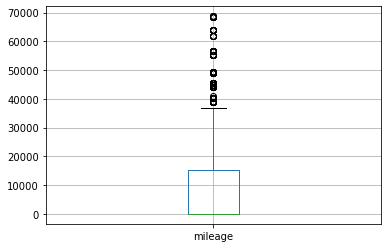

In [12]:
## outlier
df2.boxplot(column=['mileage'])

array([[<AxesSubplot:title={'center':'mileage'}>]], dtype=object)

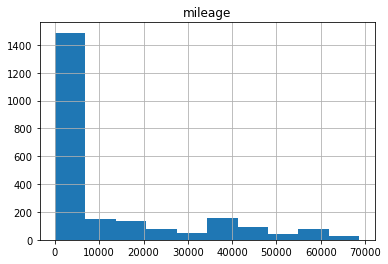

In [13]:
df2.hist(column = ['mileage'])

In [14]:
df_0 = df2.query('mileage <= 41000')

In [15]:
mean = df2['mileage'].mean()
sd = df2['mileage'].std()
df2[df2['mileage']>mean+3*sd]
q1 = np.percentile(df2.mileage,5)

In [16]:
##missing data imputation
num_cols = ['frequency','mileage','outstandingbalance','originalbalance','balanceratio']
for c in num_cols:
    mean = df2[c].mean()
    df2.loc[:,c] = df2.loc[:,c].fillna(mean)
    
df2['mileage'].dtype =='int64'
mean = df2.mileage.mean()
df2.loc[:,'mileage'] = df2.loc[:,'mileage'].fillna(mean)


/Users/wofibgf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
###query data
#Ans2 = Ans[Ans["JobTitle"].apply(lambda x: 'Sales' in x)]

# ot_vision['setup'] = ot_vision.apply(lambda x: 
#      'Profile' if ((x.setup == 1) and ('profile' in x.Comments_split))
#     else 'app/web/biz' if ((x.setup ==1) and ((' app ' in x.Comments_split)
#                                           or ('log' in x.Comments_split)
#                                              ))
#      else '',  axis=1)     

In [18]:
### date data
df2.loc[:,'weekday'] = pd.to_datetime(df2.loc[:,'auditdate'],format='%m/%d/%y').dt.day.astype('category') #year,month,hour,minute,dayofweek


/Users/wofibgf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

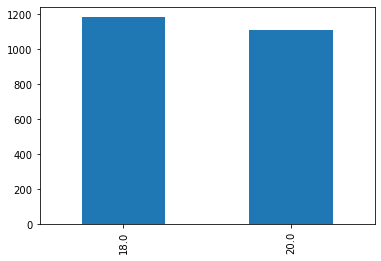

In [19]:
### Categorical data
df2['weekday'].value_counts().plot.bar()

<AxesSubplot:xlabel='conditiontype'>

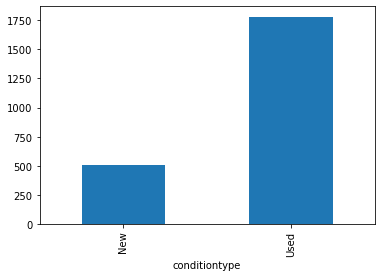

In [20]:
df2.groupby('conditiontype').size().plot.bar()

In [21]:
df2.loc[:,'conditiontype'] = df2.loc[:,'conditiontype'].fillna(df2['conditiontype'].value_counts().index[0])

In [22]:
df2.loc[:,'unitstatus'] = df2.loc[:,'unitstatus'].map(lambda x:1 if x == 'Sold'
                                         else 0).astype(int)

In [23]:
df2.shape

(2830, 26)

In [24]:
### Balance dataset
size = df2.groupby('unitstatus').size().rename('count').reset_index()

In [25]:
df3 = df2.groupby('unitstatus').apply(lambda x:x.sample(min(size['count']),replace=True)).reset_index(drop=True)

In [26]:
size

,unitstatus,count
0,0,2755
1,1,75


In [27]:
df3.shape

(150, 26)

In [28]:
## dummy variables
df3 = pd.get_dummies(data = df3.drop(['auditdate'],axis=1), drop_first = True)

In [29]:
df3.filter(like='weekday').loc[1:5]

,weekday_20.0
1,0
2,1
3,0
4,0
5,0


In [30]:
### split data
X = df3.loc[:,df3.columns != 'unitstatus']
y = df3['unitstatus']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [36]:
X_train.shape

(120, 118)

In [91]:
## feature selection 
###regression
VIF = X_train
vif = pd.Series([variance_inflation_factor(VIF.values, i) 
               for i in range(VIF.shape[1])], 
              index=VIF.columns)

vif.head()

frequency             inf
mileage               inf
outstandingbalance    inf
originalbalance       inf
balanceratio          NaN
dtype: float64

In [ ]:
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1,vmax=1,cmap='RdBu')

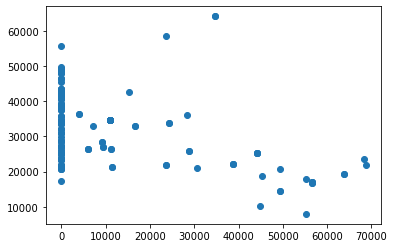

In [93]:
plt.scatter(df3.mileage,df3.outstandingbalance)

In [53]:
### feature selection
## classification
fs = SelectKBest(score_func=f_classif, k=30)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

/Users/wofibgf/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 44 65] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/wofibgf/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [54]:
X_train_fs.shape

(120, 118)

In [55]:
fs.scores_

array([7.09561034e-02, 3.70629636e-01, 2.47989324e+00, 2.47989324e+00,
                  nan, 2.40902855e+00, 4.57040130e+01, 6.11464050e+00,
       3.15508021e-01, 2.13816535e+00, 2.13816535e+00, 1.70915411e+00,
       2.13816535e+00, 1.70915411e+00, 1.70915411e+00, 3.15508021e-01,
       3.15508021e-01, 2.13816535e+00, 5.29147982e-01, 5.56020942e-01,
       7.49682338e-02, 1.28610354e+00, 1.06902821e+01, 0.00000000e+00,
       1.87632509e+00, 2.03448276e+00, 1.02608696e+00, 1.00000000e+00,
       2.05574913e-01, 2.03448276e+00, 3.37142857e-01, 7.28957529e+00,
       4.25193568e+00, 3.37142857e-01, 5.36363636e+00, 3.37142857e-01,
       2.03448276e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.03448276e+00, 4.21428571e+00, 1.00000000e+00, 3.37142857e-01,
                  nan, 3.37142857e-01, 1.02608696e+00, 1.00000000e+00,
       2.03448276e+00, 2.05574913e-01, 1.00000000e+00, 2.03448276e+00,
       2.05574913e-01, 0.00000000e+00, 3.37142857e-01, 2.03448276e+00,
      

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.070956
Feature 8: 0.074968
Feature 9: 0.205575
Feature 10: 0.205575
Feature 11: 0.205575
Feature 12: 0.315508
Feature 13: 0.315508
Feature 14: 0.315508
Feature 15: 0.337143
Feature 16: 0.337143
Feature 17: 0.337143
Feature 18: 0.337143
Feature 19: 0.337143
Feature 20: 0.337143
Feature 21: 0.337143
Feature 22: 0.337143
Feature 23: 0.337143
Feature 24: 0.337143
Feature 25: 0.337143
Feature 26: 0.337143
Feature 27: 0.337143
Feature 28: 0.337143
Feature 29: 0.365325
Feature 30: 0.370630
Feature 31: 0.529148
Feature 32: 0.556021
Feature 33: 1.000000
Feature 34: 1.000000
Feature 35: 1.000000
Feature 36: 1.000000
Feature 37: 1.000000
Feature 38: 1.000000
Feature 39: 1.000000
Feature 40: 1.000000
Feature 41: 1.000000
Feature 42: 1.000000
Feature 43: 1.000000
Feature 44: 1.000000
Feature 45: 1.000000
Feature 46: 1.000000
Feature 47: 1.000000
Fe

<BarContainer object of 118 artists>

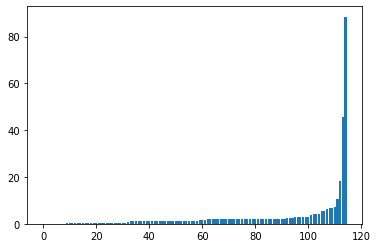

In [73]:

# what are scores for the features
fs.scores_.sort()
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)


In [32]:
### tranform data
for c in num_cols:
    ### fit on training data column
    scale = StandardScaler().fit(X_train[[c]])
    
    X_train[c] = scale.transform(X_train[[c]])
    X_test[c] = scale.transform(X_test[[c]])

<ipython-input-32-881ba16c9dab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[c] = scale.transform(X_train[[c]])
<ipython-input-32-881ba16c9dab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[c] = scale.transform(X_test[[c]])
<ipython-input-32-881ba16c9dab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [33]:
X_train

,frequency,mileage,outstandingbalance,originalbalance,balanceratio,ageofthecar,totaldayonfloor,avg_make_ba,auditid_9780869C-046B-4469-86E6-9878D004887F,auditid_E209CA8F-5656-4D28-80CC-F06D09095735,...,floorcustomdate_7/8/21,floorcustomdate_7/9/21,floorcustomdate_8/2/21,floorcustomdate_8/3/21,floorcustomdate_8/5/21,floorcustomdate_8/6/21,isinstock_True,floorplancode_102.0,floorplancode_200.0,weekday_20.0
6,-0.343203,1.628825,-0.695290,-0.695290,0.0,3,24,25275.00000,0,1,...,0,0,0,0,0,0,0,0,1,0
87,-0.343203,0.591355,0.092629,0.092629,0.0,5,25,30192.94444,0,1,...,0,0,0,0,0,0,0,0,1,0
115,1.127668,-0.672648,1.175815,1.175815,0.0,1,6,31442.68379,1,0,...,0,0,0,0,0,0,0,0,0,1
146,-0.343203,0.557140,-1.004948,-1.004948,0.0,2,12,31442.68379,0,1,...,0,0,1,0,0,0,0,0,1,0
35,-0.343203,0.121051,0.917707,0.917707,0.0,4,51,31442.68379,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.343203,-0.082360,-1.067435,-1.067435,0.0,4,20,21654.00000,0,1,...,0,0,0,0,0,0,1,0,1,0
127,1.127668,-0.672648,0.997026,0.997026,0.0,1,5,31442.68379,1,0,...,0,0,0,0,0,0,0,0,0,1
39,-0.343203,-0.672648,0.786172,0.786172,0.0,4,44,53606.40000,0,1,...,0,0,0,0,0,0,0,0,1,0
149,1.127668,-0.672648,0.997026,0.997026,0.0,1,5,31442.68379,1,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
X_train.shape

(120, 118)

In [71]:
y_train.shape

(120,)

#### Modeling

In [72]:
### Regression
LR = LinearRegression(n_jobs=-1)
LR.fit(X_train, y_train)

LinearRegression()

In [76]:

print('intercept',LR.intercept_)
print(pd.DataFrame({'predictor':X.columns,'coefficient':LR.coef_}))

regressionSummary(y_train, LR.predict(X_train))

no display found. Using non-interactive Agg backend
intercept -0.6711001348671055
                  predictor   coefficient
0                 frequency -3.081416e-11
1                   mileage -5.691185e-01
2        outstandingbalance -2.682063e+00
3           originalbalance -2.682063e+00
4              balanceratio -6.517846e-10
..                      ...           ...
113  floorcustomdate_8/6/21  1.397977e-01
114          isinstock_True  6.878382e-01
115     floorplancode_102.0 -5.408128e-01
116     floorplancode_200.0 -1.139338e+00
117            weekday_20.0  1.307452e+00

[118 rows x 2 columns]

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.1581
     Mean Absolute Error (MAE) : 0.0500


In [77]:
#### Vlidation
test_pred = LR.predict(X_test)
result = pd.DataFrame({'Predicted':test_pred,
                       'Actual': y_test,
                      ' Residual': y_test - test_pred})
print(result.head(20))
regressionSummary(y_test,test_pred)

        Predicted  Actual      Residual
130  1.000000e+00       1  8.114398e-12
145  1.000000e+00       1 -6.759038e-13
42  -2.696621e-12       0  2.696621e-12
8   -3.890555e-12       0  3.890555e-12
102  1.000000e+00       1 -5.995204e-13
18   2.852163e-12       0 -2.852163e-12
36  -6.336487e-12       0  6.336487e-12
85   1.008012e+00       1 -8.012232e-03
117  1.000000e+00       1  4.218847e-14
59  -1.601887e+00       0  1.601887e+00
98   5.000000e-01       1  5.000000e-01
144  9.379164e-12       1  1.000000e+00
25   1.367704e+00       0 -1.367704e+00
111 -5.671520e-01       1  1.567152e+00
14  -9.114931e-13       0  9.114931e-13
26   6.445955e-13       0 -6.445955e-13
15  -6.336487e-12       0  6.336487e-12
133  1.000000e+00       1 -3.004264e-13
101  1.000000e+00       1  1.578515e-12
108  1.000000e+00       1  5.120349e-13

Regression statistics

               Mean Error (ME) : -0.1778
Root Mean Squared Error (RMSE) : 1.2449
     Mean Absolute Error (MAE) : 0.5652


In [108]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())
print('Rsquared:\n',model.rsquared)

                            OLS Regression Results                            
Dep. Variable:             unitstatus   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     4.731
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.22e-07
Time:                        15:24:59   Log-Likelihood:                 51.060
No. Observations:                 120   AIC:                             55.88
Df Residuals:                      41   BIC:                             276.1
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [110]:
## Catboost regressor 
## sequentical decision trees and gradient boosting
model = CatBoostRegressor(loss_function='RMSE')
#iterations=2, depth=2, learning_rate=1,
grid = {'iterations': [100, 150, 200], ##number of trees
        'learning_rate': [0.03, 0.1], 
        'depth': [2, 4, 6, 8], ## <=8 for CPU
        'l2_leaf_reg': [0.2, 0.5, 1, 3]} ## coefficient at l2 regularization term of the cost function
model.grid_search(grid, X_train,y_train)

0:	learn: 0.7103502	test: 0.6348110	best: 0.6348110 (0)	total: 51.4ms	remaining: 5.08s
1:	learn: 0.6996585	test: 0.6248824	best: 0.6248824 (1)	total: 52.2ms	remaining: 2.56s
2:	learn: 0.6845706	test: 0.6107382	best: 0.6107382 (2)	total: 52.7ms	remaining: 1.71s
3:	learn: 0.6731107	test: 0.5976491	best: 0.5976491 (3)	total: 53.7ms	remaining: 1.29s
4:	learn: 0.6591168	test: 0.5854195	best: 0.5854195 (4)	total: 54.4ms	remaining: 1.03s
5:	learn: 0.6497916	test: 0.5773364	best: 0.5773364 (5)	total: 55.1ms	remaining: 864ms
6:	learn: 0.6411442	test: 0.5701037	best: 0.5701037 (6)	total: 55.7ms	remaining: 740ms
7:	learn: 0.6281349	test: 0.5581927	best: 0.5581927 (7)	total: 56.3ms	remaining: 647ms
8:	learn: 0.6158061	test: 0.5479938	best: 0.5479938 (8)	total: 56.9ms	remaining: 575ms
9:	learn: 0.6040431	test: 0.5379874	best: 0.5379874 (9)	total: 57.5ms	remaining: 518ms
10:	learn: 0.5926316	test: 0.5287366	best: 0.5287366 (10)	total: 58.8ms	remaining: 475ms
11:	learn: 0.5834222	test: 0.5168314	best

20:	learn: 0.3304670	test: 0.3233969	best: 0.3233969 (20)	total: 10.1ms	remaining: 38ms
21:	learn: 0.3214280	test: 0.3227298	best: 0.3227298 (21)	total: 10.6ms	remaining: 37.5ms
22:	learn: 0.3177405	test: 0.3219667	best: 0.3219667 (22)	total: 11.1ms	remaining: 37.3ms
23:	learn: 0.3152511	test: 0.3243313	best: 0.3219667 (22)	total: 11.7ms	remaining: 36.9ms
24:	learn: 0.3082048	test: 0.3214063	best: 0.3214063 (24)	total: 12.1ms	remaining: 36.4ms
25:	learn: 0.3039148	test: 0.3195153	best: 0.3195153 (25)	total: 12.6ms	remaining: 35.9ms
26:	learn: 0.2984733	test: 0.3117091	best: 0.3117091 (26)	total: 13.2ms	remaining: 35.8ms
27:	learn: 0.2962508	test: 0.3081028	best: 0.3081028 (27)	total: 14.1ms	remaining: 36.2ms
28:	learn: 0.2906105	test: 0.3071208	best: 0.3071208 (28)	total: 14.5ms	remaining: 35.4ms
29:	learn: 0.2897463	test: 0.3061285	best: 0.3061285 (29)	total: 14.9ms	remaining: 34.8ms
30:	learn: 0.2858817	test: 0.3033723	best: 0.3033723 (30)	total: 15.5ms	remaining: 34.5ms
31:	learn: 0

58:	learn: 0.3705122	test: 0.3534360	best: 0.3534360 (58)	total: 25.9ms	remaining: 18ms
59:	learn: 0.3684362	test: 0.3508069	best: 0.3508069 (59)	total: 26.4ms	remaining: 17.6ms
60:	learn: 0.3660442	test: 0.3496011	best: 0.3496011 (60)	total: 27.1ms	remaining: 17.3ms
61:	learn: 0.3642608	test: 0.3467172	best: 0.3467172 (61)	total: 27.9ms	remaining: 17.1ms
62:	learn: 0.3620139	test: 0.3456072	best: 0.3456072 (62)	total: 28.6ms	remaining: 16.8ms
63:	learn: 0.3599635	test: 0.3444609	best: 0.3444609 (63)	total: 29.2ms	remaining: 16.4ms
64:	learn: 0.3579713	test: 0.3433636	best: 0.3433636 (64)	total: 29.8ms	remaining: 16.1ms
65:	learn: 0.3564974	test: 0.3410159	best: 0.3410159 (65)	total: 30.3ms	remaining: 15.6ms
66:	learn: 0.3530710	test: 0.3386938	best: 0.3386938 (66)	total: 31ms	remaining: 15.3ms
67:	learn: 0.3516972	test: 0.3378410	best: 0.3378410 (67)	total: 31.6ms	remaining: 14.9ms
68:	learn: 0.3493061	test: 0.3371522	best: 0.3371522 (68)	total: 32.2ms	remaining: 14.5ms
69:	learn: 0.3

90:	learn: 0.1965100	test: 0.2842652	best: 0.2835513 (78)	total: 38.7ms	remaining: 25.1ms
91:	learn: 0.1954516	test: 0.2842081	best: 0.2835513 (78)	total: 39.6ms	remaining: 25ms
92:	learn: 0.1948509	test: 0.2848782	best: 0.2835513 (78)	total: 40.2ms	remaining: 24.7ms
93:	learn: 0.1941117	test: 0.2852098	best: 0.2835513 (78)	total: 41ms	remaining: 24.4ms
94:	learn: 0.1926014	test: 0.2838458	best: 0.2835513 (78)	total: 41.6ms	remaining: 24.1ms
95:	learn: 0.1914350	test: 0.2834817	best: 0.2834817 (95)	total: 42ms	remaining: 23.6ms
96:	learn: 0.1911270	test: 0.2833548	best: 0.2833548 (96)	total: 42.6ms	remaining: 23.3ms
97:	learn: 0.1906657	test: 0.2846788	best: 0.2833548 (96)	total: 43.3ms	remaining: 23ms
98:	learn: 0.1899592	test: 0.2847112	best: 0.2833548 (96)	total: 43.8ms	remaining: 22.5ms
99:	learn: 0.1894248	test: 0.2851724	best: 0.2833548 (96)	total: 44.4ms	remaining: 22.2ms
100:	learn: 0.1887574	test: 0.2855088	best: 0.2833548 (96)	total: 45ms	remaining: 21.8ms
101:	learn: 0.18828

144:	learn: 0.1716430	test: 0.2916556	best: 0.2805959 (93)	total: 70.2ms	remaining: 2.42ms
145:	learn: 0.1714365	test: 0.2925702	best: 0.2805959 (93)	total: 70.8ms	remaining: 1.94ms
146:	learn: 0.1711459	test: 0.2925015	best: 0.2805959 (93)	total: 71.7ms	remaining: 1.46ms
147:	learn: 0.1708995	test: 0.2927126	best: 0.2805959 (93)	total: 72.2ms	remaining: 975us
148:	learn: 0.1707010	test: 0.2926990	best: 0.2805959 (93)	total: 73ms	remaining: 489us
149:	learn: 0.1705724	test: 0.2931963	best: 0.2805959 (93)	total: 73.6ms	remaining: 0us

bestTest = 0.280595895
bestIteration = 93

11:	loss: 0.2805959	best: 0.2805959 (3)	total: 868ms	remaining: 6.08s
0:	learn: 0.7106732	test: 0.6351524	best: 0.6351524 (0)	total: 611us	remaining: 91.2ms
1:	learn: 0.7002802	test: 0.6259361	best: 0.6259361 (1)	total: 1.12ms	remaining: 82.6ms
2:	learn: 0.6854927	test: 0.6120091	best: 0.6120091 (2)	total: 1.75ms	remaining: 86ms
3:	learn: 0.6743591	test: 0.5992833	best: 0.5992833 (3)	total: 2.26ms	remaining: 82.5m

15:	learn: 0.5660402	test: 0.5017000	best: 0.5017000 (15)	total: 7.76ms	remaining: 65ms
16:	learn: 0.5600728	test: 0.4976748	best: 0.4976748 (16)	total: 8.37ms	remaining: 65.5ms
17:	learn: 0.5507396	test: 0.4879074	best: 0.4879074 (17)	total: 8.82ms	remaining: 64.7ms
18:	learn: 0.5418322	test: 0.4806410	best: 0.4806410 (18)	total: 9.28ms	remaining: 64ms
19:	learn: 0.5365738	test: 0.4773588	best: 0.4773588 (19)	total: 9.77ms	remaining: 63.5ms
20:	learn: 0.5275494	test: 0.4681082	best: 0.4681082 (20)	total: 10.4ms	remaining: 63.7ms
21:	learn: 0.5184363	test: 0.4611416	best: 0.4611416 (21)	total: 11.2ms	remaining: 65ms
22:	learn: 0.5125711	test: 0.4571990	best: 0.4571990 (22)	total: 12ms	remaining: 66.3ms
23:	learn: 0.5053554	test: 0.4515806	best: 0.4515806 (23)	total: 13.2ms	remaining: 69.2ms
24:	learn: 0.4989733	test: 0.4456735	best: 0.4456735 (24)	total: 13.9ms	remaining: 69.3ms
25:	learn: 0.4921649	test: 0.4403819	best: 0.4403819 (25)	total: 14.5ms	remaining: 69.1ms
26:	learn: 0.48444

80:	learn: 0.3167098	test: 0.3134377	best: 0.3132615 (79)	total: 39.3ms	remaining: 57.7ms
81:	learn: 0.3150015	test: 0.3113462	best: 0.3113462 (81)	total: 39.7ms	remaining: 57.1ms
82:	learn: 0.3144585	test: 0.3124597	best: 0.3113462 (81)	total: 40.2ms	remaining: 56.6ms
83:	learn: 0.3125360	test: 0.3098572	best: 0.3098572 (83)	total: 41ms	remaining: 56.6ms
84:	learn: 0.3111954	test: 0.3093355	best: 0.3093355 (84)	total: 41.8ms	remaining: 56.6ms
85:	learn: 0.3092166	test: 0.3086999	best: 0.3086999 (85)	total: 42.5ms	remaining: 56.3ms
86:	learn: 0.3076185	test: 0.3080108	best: 0.3080108 (86)	total: 43.1ms	remaining: 56ms
87:	learn: 0.3071844	test: 0.3079393	best: 0.3079393 (87)	total: 43.6ms	remaining: 55.5ms
88:	learn: 0.3064081	test: 0.3078273	best: 0.3078273 (88)	total: 44.4ms	remaining: 55.4ms
89:	learn: 0.3048936	test: 0.3072427	best: 0.3072427 (89)	total: 45.3ms	remaining: 55.3ms
90:	learn: 0.3037976	test: 0.3073753	best: 0.3072427 (89)	total: 45.8ms	remaining: 54.8ms
91:	learn: 0.3

30:	learn: 0.4547417	test: 0.4074871	best: 0.4074627 (29)	total: 15.7ms	remaining: 85.7ms
31:	learn: 0.4502049	test: 0.4045335	best: 0.4045335 (31)	total: 16.5ms	remaining: 86.8ms
32:	learn: 0.4429309	test: 0.4010637	best: 0.4010637 (32)	total: 17.5ms	remaining: 88.3ms
33:	learn: 0.4402504	test: 0.3997060	best: 0.3997060 (33)	total: 18.4ms	remaining: 89.7ms
34:	learn: 0.4347395	test: 0.3954239	best: 0.3954239 (34)	total: 19.2ms	remaining: 90.4ms
35:	learn: 0.4296819	test: 0.3918261	best: 0.3918261 (35)	total: 19.9ms	remaining: 90.8ms
36:	learn: 0.4253059	test: 0.3884413	best: 0.3884413 (36)	total: 20.8ms	remaining: 91.4ms
37:	learn: 0.4204799	test: 0.3852211	best: 0.3852211 (37)	total: 21.6ms	remaining: 92.1ms
38:	learn: 0.4158535	test: 0.3822989	best: 0.3822989 (38)	total: 22.3ms	remaining: 92ms
39:	learn: 0.4115512	test: 0.3794183	best: 0.3794183 (39)	total: 22.9ms	remaining: 91.4ms
40:	learn: 0.4078044	test: 0.3757769	best: 0.3757769 (40)	total: 23.6ms	remaining: 91.5ms
41:	learn: 0

86:	learn: 0.2046601	test: 0.2837626	best: 0.2837626 (86)	total: 79.1ms	remaining: 103ms
87:	learn: 0.2041959	test: 0.2834869	best: 0.2834869 (87)	total: 80ms	remaining: 102ms
88:	learn: 0.2022621	test: 0.2814142	best: 0.2814142 (88)	total: 81ms	remaining: 101ms
89:	learn: 0.2017344	test: 0.2816329	best: 0.2814142 (88)	total: 81.8ms	remaining: 100ms
90:	learn: 0.2009882	test: 0.2820374	best: 0.2814142 (88)	total: 82.8ms	remaining: 99.2ms
91:	learn: 0.2002503	test: 0.2808174	best: 0.2808174 (91)	total: 83.7ms	remaining: 98.3ms
92:	learn: 0.1995568	test: 0.2806007	best: 0.2806007 (92)	total: 84.7ms	remaining: 97.4ms
93:	learn: 0.1992453	test: 0.2805959	best: 0.2805959 (93)	total: 85.7ms	remaining: 96.6ms
94:	learn: 0.1986736	test: 0.2815874	best: 0.2805959 (93)	total: 86.6ms	remaining: 95.7ms
95:	learn: 0.1976621	test: 0.2814298	best: 0.2805959 (93)	total: 87.3ms	remaining: 94.6ms
96:	learn: 0.1970751	test: 0.2814645	best: 0.2805959 (93)	total: 88.1ms	remaining: 93.6ms
97:	learn: 0.19650

47:	learn: 0.2539069	test: 0.3010562	best: 0.3001671 (45)	total: 21.1ms	remaining: 66.7ms
48:	learn: 0.2526956	test: 0.3019502	best: 0.3001671 (45)	total: 21.9ms	remaining: 67.4ms
49:	learn: 0.2520653	test: 0.3011738	best: 0.3001671 (45)	total: 22.4ms	remaining: 67.1ms
50:	learn: 0.2504251	test: 0.3007318	best: 0.3001671 (45)	total: 23.1ms	remaining: 67.4ms
51:	learn: 0.2489603	test: 0.2981034	best: 0.2981034 (51)	total: 23.8ms	remaining: 67.6ms
52:	learn: 0.2481957	test: 0.2982193	best: 0.2981034 (51)	total: 24.3ms	remaining: 67.5ms
53:	learn: 0.2460524	test: 0.2969132	best: 0.2969132 (53)	total: 25ms	remaining: 67.5ms
54:	learn: 0.2446185	test: 0.2968971	best: 0.2968971 (54)	total: 25.7ms	remaining: 67.8ms
55:	learn: 0.2437473	test: 0.2969133	best: 0.2968971 (54)	total: 26.5ms	remaining: 68.2ms
56:	learn: 0.2395082	test: 0.2970825	best: 0.2968971 (54)	total: 27.3ms	remaining: 68.4ms
57:	learn: 0.2387254	test: 0.2973529	best: 0.2968971 (54)	total: 28.1ms	remaining: 68.8ms
58:	learn: 0

20:	learn: 0.3414213	test: 0.3301323	best: 0.3301323 (20)	total: 10ms	remaining: 85.7ms
21:	learn: 0.3321371	test: 0.3293162	best: 0.3293162 (21)	total: 10.5ms	remaining: 85ms
22:	learn: 0.3276846	test: 0.3285584	best: 0.3285584 (22)	total: 11.1ms	remaining: 85.7ms
23:	learn: 0.3231367	test: 0.3228229	best: 0.3228229 (23)	total: 11.7ms	remaining: 85.9ms
24:	learn: 0.3163420	test: 0.3204294	best: 0.3204294 (24)	total: 12.5ms	remaining: 87.3ms
25:	learn: 0.3095206	test: 0.3202114	best: 0.3202114 (25)	total: 13ms	remaining: 87.3ms
26:	learn: 0.3043166	test: 0.3131368	best: 0.3131368 (26)	total: 13.7ms	remaining: 87.9ms
27:	learn: 0.3025984	test: 0.3096292	best: 0.3096292 (27)	total: 14.2ms	remaining: 87.3ms
28:	learn: 0.2971823	test: 0.3088148	best: 0.3088148 (28)	total: 14.7ms	remaining: 86.6ms
29:	learn: 0.2937371	test: 0.3070776	best: 0.3070776 (29)	total: 15.3ms	remaining: 86.7ms
30:	learn: 0.2909882	test: 0.3095774	best: 0.3070776 (29)	total: 15.8ms	remaining: 86ms
31:	learn: 0.28886

91:	learn: 0.2380427	test: 0.2773278	best: 0.2773278 (91)	total: 86.5ms	remaining: 7.53ms
92:	learn: 0.2355111	test: 0.2761506	best: 0.2761506 (92)	total: 87.8ms	remaining: 6.61ms
93:	learn: 0.2344850	test: 0.2754619	best: 0.2754619 (93)	total: 89.2ms	remaining: 5.69ms
94:	learn: 0.2334715	test: 0.2745067	best: 0.2745067 (94)	total: 89.9ms	remaining: 4.73ms
95:	learn: 0.2314415	test: 0.2749346	best: 0.2745067 (94)	total: 90.6ms	remaining: 3.77ms
96:	learn: 0.2300627	test: 0.2751271	best: 0.2745067 (94)	total: 91.4ms	remaining: 2.83ms
97:	learn: 0.2282047	test: 0.2742197	best: 0.2742197 (97)	total: 92.1ms	remaining: 1.88ms
98:	learn: 0.2270492	test: 0.2747146	best: 0.2742197 (97)	total: 92.7ms	remaining: 936us
99:	learn: 0.2262011	test: 0.2744471	best: 0.2742197 (97)	total: 93.4ms	remaining: 0us

bestTest = 0.2742197189
bestIteration = 97

24:	loss: 0.2742197	best: 0.2742197 (24)	total: 2.27s	remaining: 6.46s
0:	learn: 0.6812753	test: 0.6131693	best: 0.6131693 (0)	total: 696us	remaining

8:	learn: 0.4279640	test: 0.4051948	best: 0.4051948 (8)	total: 9.44ms	remaining: 95.5ms
9:	learn: 0.4135748	test: 0.3874220	best: 0.3874220 (9)	total: 10.9ms	remaining: 98.3ms
10:	learn: 0.3936600	test: 0.3724141	best: 0.3724141 (10)	total: 11.7ms	remaining: 94.7ms
11:	learn: 0.3792548	test: 0.3669404	best: 0.3669404 (11)	total: 12.5ms	remaining: 92ms
12:	learn: 0.3618682	test: 0.3531903	best: 0.3531903 (12)	total: 13.6ms	remaining: 91.3ms
13:	learn: 0.3462148	test: 0.3404845	best: 0.3404845 (13)	total: 14.5ms	remaining: 89.1ms
14:	learn: 0.3413312	test: 0.3408401	best: 0.3404845 (13)	total: 15.2ms	remaining: 86.3ms
15:	learn: 0.3272643	test: 0.3298452	best: 0.3298452 (15)	total: 16ms	remaining: 84ms
16:	learn: 0.3149652	test: 0.3165542	best: 0.3165542 (16)	total: 16.7ms	remaining: 81.6ms
17:	learn: 0.3087579	test: 0.3097694	best: 0.3097694 (17)	total: 17.6ms	remaining: 80ms
18:	learn: 0.2955268	test: 0.3003174	best: 0.3003174 (18)	total: 18.3ms	remaining: 77.8ms
19:	learn: 0.2880839	t

22:	learn: 0.2722797	test: 0.2917541	best: 0.2917541 (22)	total: 18.6ms	remaining: 62.2ms
23:	learn: 0.2640961	test: 0.2906804	best: 0.2906804 (23)	total: 19.8ms	remaining: 62.6ms
24:	learn: 0.2606208	test: 0.2872979	best: 0.2872979 (24)	total: 20.7ms	remaining: 62.1ms
25:	learn: 0.2542852	test: 0.2868716	best: 0.2868716 (25)	total: 21.5ms	remaining: 61.1ms
26:	learn: 0.2454959	test: 0.2825668	best: 0.2825668 (26)	total: 22.2ms	remaining: 59.9ms
27:	learn: 0.2416731	test: 0.2795858	best: 0.2795858 (27)	total: 23ms	remaining: 59.2ms
28:	learn: 0.2387366	test: 0.2781937	best: 0.2781937 (28)	total: 24ms	remaining: 58.8ms
29:	learn: 0.2355058	test: 0.2762510	best: 0.2762510 (29)	total: 24.8ms	remaining: 57.9ms
30:	learn: 0.2338135	test: 0.2759600	best: 0.2759600 (30)	total: 25.6ms	remaining: 56.9ms
31:	learn: 0.2296256	test: 0.2750178	best: 0.2750178 (31)	total: 26.3ms	remaining: 55.9ms
32:	learn: 0.2277737	test: 0.2746693	best: 0.2746693 (32)	total: 27ms	remaining: 54.8ms
33:	learn: 0.221

46:	learn: 0.2102770	test: 0.2687569	best: 0.2681217 (38)	total: 35.4ms	remaining: 39.9ms
47:	learn: 0.2094099	test: 0.2686950	best: 0.2681217 (38)	total: 36.3ms	remaining: 39.3ms
48:	learn: 0.2064239	test: 0.2685858	best: 0.2681217 (38)	total: 37.5ms	remaining: 39ms
49:	learn: 0.2049710	test: 0.2685962	best: 0.2681217 (38)	total: 38.6ms	remaining: 38.6ms
50:	learn: 0.2029733	test: 0.2691331	best: 0.2681217 (38)	total: 40.1ms	remaining: 38.5ms
51:	learn: 0.2021122	test: 0.2709074	best: 0.2681217 (38)	total: 41.4ms	remaining: 38.2ms
52:	learn: 0.2015367	test: 0.2720895	best: 0.2681217 (38)	total: 42.7ms	remaining: 37.9ms
53:	learn: 0.2009335	test: 0.2721799	best: 0.2681217 (38)	total: 43.9ms	remaining: 37.4ms
54:	learn: 0.2002080	test: 0.2722973	best: 0.2681217 (38)	total: 44.9ms	remaining: 36.7ms
55:	learn: 0.1988347	test: 0.2715741	best: 0.2681217 (38)	total: 46.1ms	remaining: 36.2ms
56:	learn: 0.1969760	test: 0.2716209	best: 0.2681217 (38)	total: 47.2ms	remaining: 35.6ms
57:	learn: 0

32:	loss: 0.2713572	best: 0.2651979 (25)	total: 3.07s	remaining: 5.86s
0:	learn: 0.6812753	test: 0.6131693	best: 0.6131693 (0)	total: 1.22ms	remaining: 181ms
1:	learn: 0.6407325	test: 0.5798789	best: 0.5798789 (1)	total: 2.01ms	remaining: 149ms
2:	learn: 0.6117773	test: 0.5555634	best: 0.5555634 (2)	total: 3.29ms	remaining: 161ms
3:	learn: 0.5629840	test: 0.5119283	best: 0.5119283 (3)	total: 3.98ms	remaining: 145ms
4:	learn: 0.5427069	test: 0.4965869	best: 0.4965869 (4)	total: 4.32ms	remaining: 125ms
5:	learn: 0.5093556	test: 0.4680648	best: 0.4680648 (5)	total: 5.04ms	remaining: 121ms
6:	learn: 0.4799354	test: 0.4452825	best: 0.4452825 (6)	total: 5.8ms	remaining: 119ms
7:	learn: 0.4498335	test: 0.4221020	best: 0.4221020 (7)	total: 6.72ms	remaining: 119ms
8:	learn: 0.4240387	test: 0.4025317	best: 0.4025317 (8)	total: 7.43ms	remaining: 116ms
9:	learn: 0.4096839	test: 0.3848375	best: 0.3848375 (9)	total: 8.2ms	remaining: 115ms
10:	learn: 0.3896914	test: 0.3699308	best: 0.3699308 (10)	tot

57:	learn: 0.3173061	test: 0.3067748	best: 0.3067748 (57)	total: 48.6ms	remaining: 77.1ms
58:	learn: 0.3161859	test: 0.3070326	best: 0.3067748 (57)	total: 50.2ms	remaining: 77.5ms
59:	learn: 0.3115006	test: 0.3040935	best: 0.3040935 (59)	total: 51.2ms	remaining: 76.7ms
60:	learn: 0.3084505	test: 0.3033270	best: 0.3033270 (60)	total: 51.8ms	remaining: 75.5ms
61:	learn: 0.3052777	test: 0.3017370	best: 0.3017370 (61)	total: 52.5ms	remaining: 74.6ms
62:	learn: 0.3024883	test: 0.3001315	best: 0.3001315 (62)	total: 53.3ms	remaining: 73.6ms
63:	learn: 0.2994253	test: 0.2977672	best: 0.2977672 (63)	total: 54ms	remaining: 72.6ms
64:	learn: 0.2971574	test: 0.2958570	best: 0.2958570 (64)	total: 54.8ms	remaining: 71.6ms
65:	learn: 0.2930370	test: 0.2937240	best: 0.2937240 (65)	total: 55.4ms	remaining: 70.6ms
66:	learn: 0.2906914	test: 0.2930180	best: 0.2930180 (66)	total: 56ms	remaining: 69.4ms
67:	learn: 0.2879804	test: 0.2920695	best: 0.2920695 (67)	total: 56.8ms	remaining: 68.5ms
68:	learn: 0.2

128:	learn: 0.1457561	test: 0.2976127	best: 0.2690536 (47)	total: 98.3ms	remaining: 16ms
129:	learn: 0.1455150	test: 0.2980646	best: 0.2690536 (47)	total: 99.4ms	remaining: 15.3ms
130:	learn: 0.1452126	test: 0.2979846	best: 0.2690536 (47)	total: 101ms	remaining: 14.6ms
131:	learn: 0.1449771	test: 0.2978782	best: 0.2690536 (47)	total: 102ms	remaining: 13.9ms
132:	learn: 0.1447551	test: 0.2980195	best: 0.2690536 (47)	total: 103ms	remaining: 13.2ms
133:	learn: 0.1446816	test: 0.2980423	best: 0.2690536 (47)	total: 104ms	remaining: 12.5ms
134:	learn: 0.1445550	test: 0.2981535	best: 0.2690536 (47)	total: 106ms	remaining: 11.7ms
135:	learn: 0.1444942	test: 0.2978552	best: 0.2690536 (47)	total: 107ms	remaining: 11ms
136:	learn: 0.1443301	test: 0.2973023	best: 0.2690536 (47)	total: 108ms	remaining: 10.2ms
137:	learn: 0.1442511	test: 0.2972357	best: 0.2690536 (47)	total: 109ms	remaining: 9.51ms
138:	learn: 0.1441653	test: 0.2970426	best: 0.2690536 (47)	total: 111ms	remaining: 8.77ms
139:	learn: 

41:	learn: 0.2045186	test: 0.2688132	best: 0.2677453 (39)	total: 35.2ms	remaining: 90.5ms
42:	learn: 0.2026175	test: 0.2688655	best: 0.2677453 (39)	total: 36.3ms	remaining: 90.4ms
43:	learn: 0.2013964	test: 0.2686736	best: 0.2677453 (39)	total: 37.4ms	remaining: 90.1ms
44:	learn: 0.2006182	test: 0.2689351	best: 0.2677453 (39)	total: 38.2ms	remaining: 89.1ms
45:	learn: 0.1994270	test: 0.2677925	best: 0.2677453 (39)	total: 38.9ms	remaining: 87.9ms
46:	learn: 0.1991587	test: 0.2680247	best: 0.2677453 (39)	total: 39.3ms	remaining: 86.2ms
47:	learn: 0.1982720	test: 0.2682223	best: 0.2677453 (39)	total: 39.9ms	remaining: 84.9ms
48:	learn: 0.1962248	test: 0.2709102	best: 0.2677453 (39)	total: 40.7ms	remaining: 83.9ms
49:	learn: 0.1948976	test: 0.2709515	best: 0.2677453 (39)	total: 41.5ms	remaining: 82.9ms
50:	learn: 0.1935506	test: 0.2703390	best: 0.2677453 (39)	total: 42.2ms	remaining: 81.8ms
51:	learn: 0.1925056	test: 0.2723145	best: 0.2677453 (39)	total: 42.8ms	remaining: 80.6ms
52:	learn:

98:	learn: 0.2523797	test: 0.2788254	best: 0.2788254 (98)	total: 83.9ms	remaining: 43.2ms
99:	learn: 0.2512362	test: 0.2790796	best: 0.2788254 (98)	total: 85.2ms	remaining: 42.6ms
100:	learn: 0.2508862	test: 0.2792318	best: 0.2788254 (98)	total: 85.9ms	remaining: 41.7ms
101:	learn: 0.2495531	test: 0.2787533	best: 0.2787533 (101)	total: 86.6ms	remaining: 40.7ms
102:	learn: 0.2491877	test: 0.2789507	best: 0.2787533 (101)	total: 87.4ms	remaining: 39.9ms
103:	learn: 0.2483411	test: 0.2788550	best: 0.2787533 (101)	total: 88.1ms	remaining: 39ms
104:	learn: 0.2469778	test: 0.2780699	best: 0.2780699 (104)	total: 88.8ms	remaining: 38.1ms
105:	learn: 0.2459931	test: 0.2775664	best: 0.2775664 (105)	total: 89.6ms	remaining: 37.2ms
106:	learn: 0.2447444	test: 0.2773349	best: 0.2773349 (106)	total: 90.3ms	remaining: 36.3ms
107:	learn: 0.2441529	test: 0.2772789	best: 0.2772789 (107)	total: 91.1ms	remaining: 35.4ms
108:	learn: 0.2431268	test: 0.2766866	best: 0.2766866 (108)	total: 91.9ms	remaining: 34

3:	learn: 0.6689914	test: 0.6035923	best: 0.6035923 (3)	total: 3.81ms	remaining: 187ms
4:	learn: 0.6595258	test: 0.5954334	best: 0.5954334 (4)	total: 4.49ms	remaining: 175ms
5:	learn: 0.6455028	test: 0.5826054	best: 0.5826054 (5)	total: 5.39ms	remaining: 174ms
6:	learn: 0.6318398	test: 0.5706886	best: 0.5706886 (6)	total: 6.24ms	remaining: 172ms
7:	learn: 0.6203697	test: 0.5607432	best: 0.5607432 (7)	total: 6.92ms	remaining: 166ms
8:	learn: 0.6071915	test: 0.5483052	best: 0.5483052 (8)	total: 7.97ms	remaining: 169ms
9:	learn: 0.5974838	test: 0.5364076	best: 0.5364076 (9)	total: 9.45ms	remaining: 180ms
10:	learn: 0.5879695	test: 0.5259723	best: 0.5259723 (10)	total: 10.4ms	remaining: 179ms
11:	learn: 0.5770544	test: 0.5173192	best: 0.5173192 (11)	total: 11.2ms	remaining: 175ms
12:	learn: 0.5650318	test: 0.5067529	best: 0.5067529 (12)	total: 12ms	remaining: 172ms
13:	learn: 0.5541864	test: 0.4950709	best: 0.4950709 (13)	total: 12.7ms	remaining: 169ms
14:	learn: 0.5477155	test: 0.4905621	

14:	learn: 0.3349406	test: 0.3315886	best: 0.3312105 (13)	total: 14.6ms	remaining: 180ms
15:	learn: 0.3206958	test: 0.3204235	best: 0.3204235 (15)	total: 15.8ms	remaining: 182ms
16:	learn: 0.3084970	test: 0.3075760	best: 0.3075760 (16)	total: 16.5ms	remaining: 178ms
17:	learn: 0.3025507	test: 0.3076963	best: 0.3075760 (16)	total: 17.4ms	remaining: 175ms
18:	learn: 0.2895018	test: 0.2979684	best: 0.2979684 (18)	total: 18.1ms	remaining: 172ms
19:	learn: 0.2821888	test: 0.2935479	best: 0.2935479 (19)	total: 18.8ms	remaining: 169ms
20:	learn: 0.2766424	test: 0.2905613	best: 0.2905613 (20)	total: 19.5ms	remaining: 166ms
21:	learn: 0.2690776	test: 0.2867580	best: 0.2867580 (21)	total: 20.3ms	remaining: 164ms
22:	learn: 0.2609246	test: 0.2879046	best: 0.2867580 (21)	total: 21ms	remaining: 161ms
23:	learn: 0.2529759	test: 0.2867077	best: 0.2867077 (23)	total: 21.7ms	remaining: 159ms
24:	learn: 0.2492768	test: 0.2834343	best: 0.2834343 (24)	total: 22.4ms	remaining: 157ms
25:	learn: 0.2430538	te

29:	learn: 0.4333259	test: 0.3890503	best: 0.3890503 (29)	total: 25.6ms	remaining: 145ms
30:	learn: 0.4272828	test: 0.3851555	best: 0.3851555 (30)	total: 27.3ms	remaining: 149ms
31:	learn: 0.4209661	test: 0.3781464	best: 0.3781464 (31)	total: 28ms	remaining: 147ms
32:	learn: 0.4165524	test: 0.3740977	best: 0.3740977 (32)	total: 28.8ms	remaining: 146ms
33:	learn: 0.4099266	test: 0.3698359	best: 0.3698359 (33)	total: 29.6ms	remaining: 144ms
34:	learn: 0.4048172	test: 0.3656655	best: 0.3656655 (34)	total: 30.3ms	remaining: 143ms
35:	learn: 0.3995597	test: 0.3602340	best: 0.3602340 (35)	total: 30.9ms	remaining: 141ms
36:	learn: 0.3967233	test: 0.3567116	best: 0.3567116 (36)	total: 31.7ms	remaining: 140ms
37:	learn: 0.3935121	test: 0.3540448	best: 0.3540448 (37)	total: 32.4ms	remaining: 138ms
38:	learn: 0.3896962	test: 0.3503883	best: 0.3503883 (38)	total: 33.2ms	remaining: 137ms
39:	learn: 0.3829109	test: 0.3450109	best: 0.3450109 (39)	total: 33.9ms	remaining: 136ms
40:	learn: 0.3762906	te

57:	learn: 0.1752433	test: 0.2735181	best: 0.2690536 (47)	total: 42.5ms	remaining: 104ms
58:	learn: 0.1744061	test: 0.2740958	best: 0.2690536 (47)	total: 44.1ms	remaining: 105ms
59:	learn: 0.1737137	test: 0.2745566	best: 0.2690536 (47)	total: 45.5ms	remaining: 106ms
60:	learn: 0.1721989	test: 0.2742188	best: 0.2690536 (47)	total: 46.6ms	remaining: 106ms
61:	learn: 0.1712666	test: 0.2755615	best: 0.2690536 (47)	total: 47.8ms	remaining: 106ms
62:	learn: 0.1704917	test: 0.2753324	best: 0.2690536 (47)	total: 48.8ms	remaining: 106ms
63:	learn: 0.1693502	test: 0.2768709	best: 0.2690536 (47)	total: 49.9ms	remaining: 106ms
64:	learn: 0.1679591	test: 0.2762522	best: 0.2690536 (47)	total: 51.1ms	remaining: 106ms
65:	learn: 0.1673451	test: 0.2765941	best: 0.2690536 (47)	total: 52.1ms	remaining: 106ms
66:	learn: 0.1667317	test: 0.2774154	best: 0.2690536 (47)	total: 53.2ms	remaining: 106ms
67:	learn: 0.1662476	test: 0.2780035	best: 0.2690536 (47)	total: 54.7ms	remaining: 106ms
68:	learn: 0.1655698	

90:	learn: 0.2462845	test: 0.2757888	best: 0.2757407 (89)	total: 66.4ms	remaining: 79.6ms
91:	learn: 0.2455349	test: 0.2761355	best: 0.2757407 (89)	total: 68.3ms	remaining: 80.2ms
92:	learn: 0.2429338	test: 0.2750381	best: 0.2750381 (92)	total: 69.7ms	remaining: 80.2ms
93:	learn: 0.2419533	test: 0.2746905	best: 0.2746905 (93)	total: 70.7ms	remaining: 79.8ms
94:	learn: 0.2410350	test: 0.2737405	best: 0.2737405 (94)	total: 72.1ms	remaining: 79.7ms
95:	learn: 0.2391281	test: 0.2740174	best: 0.2737405 (94)	total: 73.3ms	remaining: 79.4ms
96:	learn: 0.2376861	test: 0.2741924	best: 0.2737405 (94)	total: 74.5ms	remaining: 79.1ms
97:	learn: 0.2358236	test: 0.2732641	best: 0.2732641 (97)	total: 75.6ms	remaining: 78.6ms
98:	learn: 0.2350751	test: 0.2734459	best: 0.2732641 (97)	total: 76.7ms	remaining: 78.3ms
99:	learn: 0.2342419	test: 0.2731768	best: 0.2731768 (99)	total: 77.8ms	remaining: 77.8ms
100:	learn: 0.2329428	test: 0.2726446	best: 0.2726446 (100)	total: 79.1ms	remaining: 77.6ms
101:	lea

119:	learn: 0.1492206	test: 0.2951057	best: 0.2677453 (39)	total: 91.2ms	remaining: 60.8ms
120:	learn: 0.1490069	test: 0.2952769	best: 0.2677453 (39)	total: 92.3ms	remaining: 60.3ms
121:	learn: 0.1485854	test: 0.2964783	best: 0.2677453 (39)	total: 93.2ms	remaining: 59.6ms
122:	learn: 0.1484788	test: 0.2962402	best: 0.2677453 (39)	total: 94.1ms	remaining: 58.9ms
123:	learn: 0.1483081	test: 0.2960857	best: 0.2677453 (39)	total: 94.8ms	remaining: 58.1ms
124:	learn: 0.1482215	test: 0.2957659	best: 0.2677453 (39)	total: 95.5ms	remaining: 57.3ms
125:	learn: 0.1479882	test: 0.2962039	best: 0.2677453 (39)	total: 96.2ms	remaining: 56.5ms
126:	learn: 0.1478247	test: 0.2965578	best: 0.2677453 (39)	total: 97ms	remaining: 55.7ms
127:	learn: 0.1476049	test: 0.2966492	best: 0.2677453 (39)	total: 97.7ms	remaining: 55ms
128:	learn: 0.1475289	test: 0.2965879	best: 0.2677453 (39)	total: 98.4ms	remaining: 54.2ms
129:	learn: 0.1472132	test: 0.2964419	best: 0.2677453 (39)	total: 99.2ms	remaining: 53.4ms
130

133:	learn: 0.2208612	test: 0.2704763	best: 0.2701918 (132)	total: 111ms	remaining: 54.8ms
134:	learn: 0.2196000	test: 0.2702496	best: 0.2701918 (132)	total: 113ms	remaining: 54.2ms
135:	learn: 0.2189690	test: 0.2700625	best: 0.2700625 (135)	total: 113ms	remaining: 53.3ms
136:	learn: 0.2182811	test: 0.2698473	best: 0.2698473 (136)	total: 114ms	remaining: 52.4ms
137:	learn: 0.2177168	test: 0.2697541	best: 0.2697541 (137)	total: 115ms	remaining: 51.5ms
138:	learn: 0.2170292	test: 0.2697790	best: 0.2697541 (137)	total: 115ms	remaining: 50.7ms
139:	learn: 0.2167777	test: 0.2697559	best: 0.2697541 (137)	total: 116ms	remaining: 49.8ms
140:	learn: 0.2159543	test: 0.2701096	best: 0.2697541 (137)	total: 117ms	remaining: 48.9ms
141:	learn: 0.2157193	test: 0.2702049	best: 0.2697541 (137)	total: 118ms	remaining: 48.1ms
142:	learn: 0.2153545	test: 0.2701576	best: 0.2697541 (137)	total: 118ms	remaining: 47.2ms
143:	learn: 0.2149245	test: 0.2705120	best: 0.2697541 (137)	total: 119ms	remaining: 46.3ms

145:	learn: 0.1539126	test: 0.2876729	best: 0.2681217 (38)	total: 122ms	remaining: 45ms
146:	learn: 0.1537578	test: 0.2876970	best: 0.2681217 (38)	total: 123ms	remaining: 44.3ms
147:	learn: 0.1536916	test: 0.2879183	best: 0.2681217 (38)	total: 123ms	remaining: 43.4ms
148:	learn: 0.1536348	test: 0.2882075	best: 0.2681217 (38)	total: 124ms	remaining: 42.6ms
149:	learn: 0.1535318	test: 0.2881155	best: 0.2681217 (38)	total: 125ms	remaining: 41.7ms
150:	learn: 0.1533734	test: 0.2884797	best: 0.2681217 (38)	total: 126ms	remaining: 40.8ms
151:	learn: 0.1532488	test: 0.2886239	best: 0.2681217 (38)	total: 127ms	remaining: 40ms
152:	learn: 0.1529940	test: 0.2890965	best: 0.2681217 (38)	total: 127ms	remaining: 39.1ms
153:	learn: 0.1529290	test: 0.2890929	best: 0.2681217 (38)	total: 128ms	remaining: 38.3ms
154:	learn: 0.1527961	test: 0.2891534	best: 0.2681217 (38)	total: 129ms	remaining: 37.6ms
155:	learn: 0.1526328	test: 0.2894117	best: 0.2681217 (38)	total: 131ms	remaining: 36.9ms
156:	learn: 0.

95:	learn: 0.1982966	test: 0.2766352	best: 0.2764832 (79)	total: 131ms	remaining: 5.46ms
96:	learn: 0.1973365	test: 0.2766241	best: 0.2764832 (79)	total: 133ms	remaining: 4.11ms
97:	learn: 0.1959717	test: 0.2773200	best: 0.2764832 (79)	total: 134ms	remaining: 2.74ms
98:	learn: 0.1948972	test: 0.2779875	best: 0.2764832 (79)	total: 136ms	remaining: 1.37ms
99:	learn: 0.1935501	test: 0.2786112	best: 0.2764832 (79)	total: 137ms	remaining: 0us

bestTest = 0.2764832354
bestIteration = 79

48:	loss: 0.2764832	best: 0.2651979 (25)	total: 5.69s	remaining: 5.46s
0:	learn: 0.6772830	test: 0.6093741	best: 0.6093741 (0)	total: 1.86ms	remaining: 184ms
1:	learn: 0.6414504	test: 0.5824569	best: 0.5824569 (1)	total: 3.64ms	remaining: 179ms
2:	learn: 0.5914555	test: 0.5329176	best: 0.5329176 (2)	total: 5.42ms	remaining: 175ms
3:	learn: 0.5524542	test: 0.4978508	best: 0.4978508 (3)	total: 6.71ms	remaining: 161ms
4:	learn: 0.5135080	test: 0.4605385	best: 0.4605385 (4)	total: 8.47ms	remaining: 161ms
5:	lear

22:	learn: 0.4585672	test: 0.4177963	best: 0.4177963 (22)	total: 31.3ms	remaining: 105ms
23:	learn: 0.4496802	test: 0.4100881	best: 0.4100881 (23)	total: 33.7ms	remaining: 107ms
24:	learn: 0.4419793	test: 0.4019771	best: 0.4019771 (24)	total: 35.2ms	remaining: 106ms
25:	learn: 0.4345798	test: 0.3953255	best: 0.3953255 (25)	total: 36.4ms	remaining: 104ms
26:	learn: 0.4280182	test: 0.3899992	best: 0.3899992 (26)	total: 37.9ms	remaining: 102ms
27:	learn: 0.4197526	test: 0.3830767	best: 0.3830767 (27)	total: 39.9ms	remaining: 103ms
28:	learn: 0.4136729	test: 0.3788987	best: 0.3788987 (28)	total: 40.8ms	remaining: 99.9ms
29:	learn: 0.4083846	test: 0.3746263	best: 0.3746263 (29)	total: 42.7ms	remaining: 99.7ms
30:	learn: 0.4007826	test: 0.3699744	best: 0.3699744 (30)	total: 44.5ms	remaining: 99ms
31:	learn: 0.3952386	test: 0.3651048	best: 0.3651048 (31)	total: 46.3ms	remaining: 98.3ms
32:	learn: 0.3915463	test: 0.3625267	best: 0.3625267 (32)	total: 47.9ms	remaining: 97.3ms
33:	learn: 0.38605

52:	learn: 0.1562610	test: 0.2877976	best: 0.2756099 (32)	total: 73ms	remaining: 64.7ms
53:	learn: 0.1552784	test: 0.2881672	best: 0.2756099 (32)	total: 74.6ms	remaining: 63.6ms
54:	learn: 0.1540280	test: 0.2881160	best: 0.2756099 (32)	total: 75.9ms	remaining: 62.1ms
55:	learn: 0.1531573	test: 0.2890301	best: 0.2756099 (32)	total: 77.2ms	remaining: 60.7ms
56:	learn: 0.1524934	test: 0.2890092	best: 0.2756099 (32)	total: 78.6ms	remaining: 59.3ms
57:	learn: 0.1520745	test: 0.2892905	best: 0.2756099 (32)	total: 80.5ms	remaining: 58.3ms
58:	learn: 0.1517248	test: 0.2894129	best: 0.2756099 (32)	total: 82.5ms	remaining: 57.3ms
59:	learn: 0.1513413	test: 0.2891127	best: 0.2756099 (32)	total: 84.1ms	remaining: 56.1ms
60:	learn: 0.1506893	test: 0.2897673	best: 0.2756099 (32)	total: 86.2ms	remaining: 55.1ms
61:	learn: 0.1497838	test: 0.2913864	best: 0.2756099 (32)	total: 87.7ms	remaining: 53.8ms
62:	learn: 0.1489761	test: 0.2921819	best: 0.2756099 (32)	total: 89.6ms	remaining: 52.6ms
63:	learn: 0

83:	learn: 0.2351523	test: 0.2715793	best: 0.2715793 (83)	total: 113ms	remaining: 21.5ms
84:	learn: 0.2332877	test: 0.2718598	best: 0.2715793 (83)	total: 115ms	remaining: 20.2ms
85:	learn: 0.2307082	test: 0.2710508	best: 0.2710508 (85)	total: 116ms	remaining: 18.9ms
86:	learn: 0.2301776	test: 0.2711797	best: 0.2710508 (85)	total: 118ms	remaining: 17.6ms
87:	learn: 0.2288701	test: 0.2709326	best: 0.2709326 (87)	total: 120ms	remaining: 16.3ms
88:	learn: 0.2275207	test: 0.2711935	best: 0.2709326 (87)	total: 122ms	remaining: 15ms
89:	learn: 0.2256381	test: 0.2716728	best: 0.2709326 (87)	total: 124ms	remaining: 13.7ms
90:	learn: 0.2245922	test: 0.2711711	best: 0.2709326 (87)	total: 125ms	remaining: 12.4ms
91:	learn: 0.2235826	test: 0.2705042	best: 0.2705042 (91)	total: 127ms	remaining: 11.1ms
92:	learn: 0.2218744	test: 0.2705763	best: 0.2705042 (91)	total: 129ms	remaining: 9.74ms
93:	learn: 0.2200221	test: 0.2703622	best: 0.2703622 (93)	total: 131ms	remaining: 8.38ms
94:	learn: 0.2188793	te

16:	learn: 0.5413651	test: 0.4830579	best: 0.4830579 (16)	total: 21.6ms	remaining: 106ms
17:	learn: 0.5301919	test: 0.4725876	best: 0.4725876 (17)	total: 23.6ms	remaining: 107ms
18:	learn: 0.5211694	test: 0.4640580	best: 0.4640580 (18)	total: 25.7ms	remaining: 110ms
19:	learn: 0.5146291	test: 0.4578770	best: 0.4578770 (19)	total: 26.8ms	remaining: 107ms
20:	learn: 0.5052278	test: 0.4490174	best: 0.4490174 (20)	total: 29.2ms	remaining: 110ms
21:	learn: 0.4968281	test: 0.4430846	best: 0.4430846 (21)	total: 31.3ms	remaining: 111ms
22:	learn: 0.4887702	test: 0.4348372	best: 0.4348372 (22)	total: 33.2ms	remaining: 111ms
23:	learn: 0.4803512	test: 0.4272932	best: 0.4272932 (23)	total: 35ms	remaining: 111ms
24:	learn: 0.4728574	test: 0.4187738	best: 0.4187738 (24)	total: 36.8ms	remaining: 111ms
25:	learn: 0.4661032	test: 0.4129912	best: 0.4129912 (25)	total: 38.3ms	remaining: 109ms
26:	learn: 0.4596930	test: 0.4075199	best: 0.4075199 (26)	total: 40.1ms	remaining: 108ms
27:	learn: 0.4524221	te

44:	learn: 0.1961071	test: 0.2720124	best: 0.2680284 (30)	total: 63.5ms	remaining: 77.6ms
45:	learn: 0.1949851	test: 0.2706379	best: 0.2680284 (30)	total: 65.4ms	remaining: 76.8ms
46:	learn: 0.1919333	test: 0.2703732	best: 0.2680284 (30)	total: 67.2ms	remaining: 75.7ms
47:	learn: 0.1909143	test: 0.2710471	best: 0.2680284 (30)	total: 69.2ms	remaining: 75ms
48:	learn: 0.1899395	test: 0.2710643	best: 0.2680284 (30)	total: 71.3ms	remaining: 74.2ms
49:	learn: 0.1887604	test: 0.2712742	best: 0.2680284 (30)	total: 73.5ms	remaining: 73.5ms
50:	learn: 0.1875844	test: 0.2711310	best: 0.2680284 (30)	total: 75.3ms	remaining: 72.3ms
51:	learn: 0.1856340	test: 0.2734702	best: 0.2680284 (30)	total: 76.8ms	remaining: 70.9ms
52:	learn: 0.1826429	test: 0.2735686	best: 0.2680284 (30)	total: 78.2ms	remaining: 69.4ms
53:	learn: 0.1818218	test: 0.2734064	best: 0.2680284 (30)	total: 79.8ms	remaining: 68ms
54:	learn: 0.1813399	test: 0.2734994	best: 0.2680284 (30)	total: 81.2ms	remaining: 66.4ms
55:	learn: 0.1

72:	learn: 0.2369014	test: 0.2826823	best: 0.2826823 (72)	total: 102ms	remaining: 107ms
73:	learn: 0.2334211	test: 0.2819530	best: 0.2819530 (73)	total: 104ms	remaining: 107ms
74:	learn: 0.2302831	test: 0.2806004	best: 0.2806004 (74)	total: 106ms	remaining: 106ms
75:	learn: 0.2277555	test: 0.2792691	best: 0.2792691 (75)	total: 107ms	remaining: 105ms
76:	learn: 0.2260594	test: 0.2782416	best: 0.2782416 (76)	total: 109ms	remaining: 103ms
77:	learn: 0.2243640	test: 0.2770765	best: 0.2770765 (77)	total: 110ms	remaining: 102ms
78:	learn: 0.2222427	test: 0.2767713	best: 0.2767713 (78)	total: 112ms	remaining: 101ms
79:	learn: 0.2196863	test: 0.2764832	best: 0.2764832 (79)	total: 113ms	remaining: 99ms
80:	learn: 0.2184069	test: 0.2777513	best: 0.2764832 (79)	total: 114ms	remaining: 97.4ms
81:	learn: 0.2161069	test: 0.2768379	best: 0.2764832 (79)	total: 116ms	remaining: 95.9ms
82:	learn: 0.2149534	test: 0.2767143	best: 0.2764832 (79)	total: 117ms	remaining: 94.5ms
83:	learn: 0.2132416	test: 0.2

16:	learn: 0.2697951	test: 0.2989038	best: 0.2989038 (16)	total: 22.5ms	remaining: 176ms
17:	learn: 0.2567100	test: 0.2909075	best: 0.2909075 (17)	total: 24.9ms	remaining: 182ms
18:	learn: 0.2485740	test: 0.2878933	best: 0.2878933 (18)	total: 26.5ms	remaining: 183ms
19:	learn: 0.2402124	test: 0.2857103	best: 0.2857103 (19)	total: 28.3ms	remaining: 184ms
20:	learn: 0.2292932	test: 0.2818079	best: 0.2818079 (20)	total: 29.9ms	remaining: 184ms
21:	learn: 0.2234770	test: 0.2778835	best: 0.2778835 (21)	total: 31.1ms	remaining: 181ms
22:	learn: 0.2172893	test: 0.2790675	best: 0.2778835 (21)	total: 32.6ms	remaining: 180ms
23:	learn: 0.2119605	test: 0.2807939	best: 0.2778835 (21)	total: 34.1ms	remaining: 179ms
24:	learn: 0.2091927	test: 0.2808086	best: 0.2778835 (21)	total: 35.6ms	remaining: 178ms
25:	learn: 0.2072019	test: 0.2806893	best: 0.2778835 (21)	total: 36.6ms	remaining: 175ms
26:	learn: 0.2040778	test: 0.2799580	best: 0.2778835 (21)	total: 37.3ms	remaining: 170ms
27:	learn: 0.1999257	

142:	learn: 0.1385590	test: 0.3083127	best: 0.2778835 (21)	total: 210ms	remaining: 10.3ms
143:	learn: 0.1385417	test: 0.3084079	best: 0.2778835 (21)	total: 212ms	remaining: 8.82ms
144:	learn: 0.1385292	test: 0.3085436	best: 0.2778835 (21)	total: 213ms	remaining: 7.36ms
145:	learn: 0.1385127	test: 0.3085361	best: 0.2778835 (21)	total: 215ms	remaining: 5.89ms
146:	learn: 0.1384983	test: 0.3085239	best: 0.2778835 (21)	total: 216ms	remaining: 4.41ms
147:	learn: 0.1384934	test: 0.3084813	best: 0.2778835 (21)	total: 218ms	remaining: 2.94ms
148:	learn: 0.1384892	test: 0.3084608	best: 0.2778835 (21)	total: 219ms	remaining: 1.47ms
149:	learn: 0.1384800	test: 0.3082853	best: 0.2778835 (21)	total: 220ms	remaining: 0us

bestTest = 0.2778834953
bestIteration = 21

57:	loss: 0.2778835	best: 0.2635165 (54)	total: 7.3s	remaining: 4.79s
0:	learn: 0.7087835	test: 0.6348069	best: 0.6348069 (0)	total: 1.45ms	remaining: 216ms
1:	learn: 0.6973705	test: 0.6255206	best: 0.6255206 (1)	total: 2.86ms	remaining: 

121:	learn: 0.1814089	test: 0.2771275	best: 0.2722301 (96)	total: 175ms	remaining: 40.1ms
122:	learn: 0.1811896	test: 0.2770002	best: 0.2722301 (96)	total: 177ms	remaining: 38.9ms
123:	learn: 0.1804926	test: 0.2772871	best: 0.2722301 (96)	total: 179ms	remaining: 37.5ms
124:	learn: 0.1802027	test: 0.2772264	best: 0.2722301 (96)	total: 180ms	remaining: 36ms
125:	learn: 0.1792650	test: 0.2775316	best: 0.2722301 (96)	total: 181ms	remaining: 34.5ms
126:	learn: 0.1784783	test: 0.2777955	best: 0.2722301 (96)	total: 183ms	remaining: 33.1ms
127:	learn: 0.1779702	test: 0.2786575	best: 0.2722301 (96)	total: 184ms	remaining: 31.6ms
128:	learn: 0.1773571	test: 0.2786814	best: 0.2722301 (96)	total: 185ms	remaining: 30.2ms
129:	learn: 0.1767196	test: 0.2789723	best: 0.2722301 (96)	total: 187ms	remaining: 28.7ms
130:	learn: 0.1759963	test: 0.2791396	best: 0.2722301 (96)	total: 188ms	remaining: 27.3ms
131:	learn: 0.1753953	test: 0.2793343	best: 0.2722301 (96)	total: 190ms	remaining: 25.9ms
132:	learn: 

97:	learn: 0.1405190	test: 0.2981184	best: 0.2756099 (32)	total: 144ms	remaining: 76.4ms
98:	learn: 0.1404589	test: 0.2980433	best: 0.2756099 (32)	total: 146ms	remaining: 75.1ms
99:	learn: 0.1403571	test: 0.2981734	best: 0.2756099 (32)	total: 147ms	remaining: 73.6ms
100:	learn: 0.1402861	test: 0.2982080	best: 0.2756099 (32)	total: 148ms	remaining: 72ms
101:	learn: 0.1402345	test: 0.2985820	best: 0.2756099 (32)	total: 150ms	remaining: 70.5ms
102:	learn: 0.1402023	test: 0.2989009	best: 0.2756099 (32)	total: 151ms	remaining: 69ms
103:	learn: 0.1401448	test: 0.2988365	best: 0.2756099 (32)	total: 152ms	remaining: 67.4ms
104:	learn: 0.1401106	test: 0.2987539	best: 0.2756099 (32)	total: 154ms	remaining: 66ms
105:	learn: 0.1400447	test: 0.2987944	best: 0.2756099 (32)	total: 155ms	remaining: 64.4ms
106:	learn: 0.1400179	test: 0.2991650	best: 0.2756099 (32)	total: 156ms	remaining: 62.7ms
107:	learn: 0.1399132	test: 0.2994023	best: 0.2756099 (32)	total: 157ms	remaining: 61.2ms
108:	learn: 0.13984

74:	learn: 0.2501516	test: 0.2745798	best: 0.2745798 (74)	total: 106ms	remaining: 106ms
75:	learn: 0.2492344	test: 0.2750317	best: 0.2745798 (74)	total: 108ms	remaining: 105ms
76:	learn: 0.2468646	test: 0.2741387	best: 0.2741387 (76)	total: 109ms	remaining: 104ms
77:	learn: 0.2455721	test: 0.2736852	best: 0.2736852 (77)	total: 111ms	remaining: 102ms
78:	learn: 0.2430754	test: 0.2732797	best: 0.2732797 (78)	total: 112ms	remaining: 101ms
79:	learn: 0.2404434	test: 0.2727723	best: 0.2727723 (79)	total: 113ms	remaining: 99.2ms
80:	learn: 0.2400449	test: 0.2729445	best: 0.2727723 (79)	total: 114ms	remaining: 96.9ms
81:	learn: 0.2386961	test: 0.2729227	best: 0.2727723 (79)	total: 115ms	remaining: 95.4ms
82:	learn: 0.2362882	test: 0.2719067	best: 0.2719067 (82)	total: 116ms	remaining: 94ms
83:	learn: 0.2351523	test: 0.2715793	best: 0.2715793 (83)	total: 118ms	remaining: 92.5ms
84:	learn: 0.2332877	test: 0.2718598	best: 0.2715793 (83)	total: 119ms	remaining: 91.2ms
85:	learn: 0.2307082	test: 0

26:	learn: 0.2209593	test: 0.2695503	best: 0.2695503 (26)	total: 36.7ms	remaining: 167ms
27:	learn: 0.2153952	test: 0.2697081	best: 0.2695503 (26)	total: 38.9ms	remaining: 170ms
28:	learn: 0.2119111	test: 0.2699863	best: 0.2695503 (26)	total: 40.8ms	remaining: 170ms
29:	learn: 0.2087402	test: 0.2697155	best: 0.2695503 (26)	total: 42.7ms	remaining: 171ms
30:	learn: 0.2046472	test: 0.2696810	best: 0.2695503 (26)	total: 44.7ms	remaining: 171ms
31:	learn: 0.2014893	test: 0.2692674	best: 0.2692674 (31)	total: 46.9ms	remaining: 173ms
32:	learn: 0.2002759	test: 0.2701827	best: 0.2692674 (31)	total: 48.8ms	remaining: 173ms
33:	learn: 0.1971824	test: 0.2715314	best: 0.2692674 (31)	total: 50.3ms	remaining: 172ms
34:	learn: 0.1922354	test: 0.2704948	best: 0.2692674 (31)	total: 52ms	remaining: 171ms
35:	learn: 0.1900899	test: 0.2721527	best: 0.2692674 (31)	total: 53.5ms	remaining: 169ms
36:	learn: 0.1893956	test: 0.2726758	best: 0.2692674 (31)	total: 54.6ms	remaining: 167ms
37:	learn: 0.1888732	te

5:	learn: 0.6528078	test: 0.5802207	best: 0.5802207 (5)	total: 9.41ms	remaining: 226ms
6:	learn: 0.6421747	test: 0.5705230	best: 0.5705230 (6)	total: 11.4ms	remaining: 232ms
7:	learn: 0.6312897	test: 0.5627231	best: 0.5627231 (7)	total: 12.8ms	remaining: 228ms
8:	learn: 0.6230211	test: 0.5556839	best: 0.5556839 (8)	total: 13.7ms	remaining: 215ms
9:	learn: 0.6098054	test: 0.5450055	best: 0.5450055 (9)	total: 15ms	remaining: 211ms
10:	learn: 0.6015934	test: 0.5384962	best: 0.5384962 (10)	total: 16.6ms	remaining: 210ms
11:	learn: 0.5911222	test: 0.5291166	best: 0.5291166 (11)	total: 18.2ms	remaining: 210ms
12:	learn: 0.5803373	test: 0.5192845	best: 0.5192845 (12)	total: 18.9ms	remaining: 199ms
13:	learn: 0.5727639	test: 0.5108958	best: 0.5108958 (13)	total: 20.4ms	remaining: 198ms
14:	learn: 0.5639419	test: 0.5015962	best: 0.5015962 (14)	total: 21.8ms	remaining: 196ms
15:	learn: 0.5531401	test: 0.4929506	best: 0.4929506 (15)	total: 23.1ms	remaining: 194ms
16:	learn: 0.5413651	test: 0.4830

137:	learn: 0.1985645	test: 0.2645221	best: 0.2619614 (120)	total: 197ms	remaining: 17.1ms
138:	learn: 0.1978917	test: 0.2643234	best: 0.2619614 (120)	total: 199ms	remaining: 15.7ms
139:	learn: 0.1971041	test: 0.2647025	best: 0.2619614 (120)	total: 200ms	remaining: 14.3ms
140:	learn: 0.1962778	test: 0.2650376	best: 0.2619614 (120)	total: 202ms	remaining: 12.9ms
141:	learn: 0.1958966	test: 0.2653396	best: 0.2619614 (120)	total: 204ms	remaining: 11.5ms
142:	learn: 0.1954812	test: 0.2653916	best: 0.2619614 (120)	total: 205ms	remaining: 10ms
143:	learn: 0.1949233	test: 0.2652358	best: 0.2619614 (120)	total: 206ms	remaining: 8.6ms
144:	learn: 0.1944858	test: 0.2652303	best: 0.2619614 (120)	total: 208ms	remaining: 7.16ms
145:	learn: 0.1938964	test: 0.2644149	best: 0.2619614 (120)	total: 209ms	remaining: 5.72ms
146:	learn: 0.1935067	test: 0.2642795	best: 0.2619614 (120)	total: 210ms	remaining: 4.29ms
147:	learn: 0.1928924	test: 0.2636331	best: 0.2619614 (120)	total: 212ms	remaining: 2.86ms
14

117:	learn: 0.1476943	test: 0.2922054	best: 0.2680284 (30)	total: 169ms	remaining: 45.8ms
118:	learn: 0.1476167	test: 0.2924193	best: 0.2680284 (30)	total: 171ms	remaining: 44.5ms
119:	learn: 0.1473409	test: 0.2922929	best: 0.2680284 (30)	total: 172ms	remaining: 43.1ms
120:	learn: 0.1468726	test: 0.2933248	best: 0.2680284 (30)	total: 174ms	remaining: 41.7ms
121:	learn: 0.1467965	test: 0.2932448	best: 0.2680284 (30)	total: 175ms	remaining: 40.2ms
122:	learn: 0.1466689	test: 0.2931498	best: 0.2680284 (30)	total: 177ms	remaining: 38.8ms
123:	learn: 0.1465118	test: 0.2930094	best: 0.2680284 (30)	total: 178ms	remaining: 37.4ms
124:	learn: 0.1460583	test: 0.2939721	best: 0.2680284 (30)	total: 179ms	remaining: 35.9ms
125:	learn: 0.1459150	test: 0.2938452	best: 0.2680284 (30)	total: 181ms	remaining: 34.5ms
126:	learn: 0.1458517	test: 0.2938908	best: 0.2680284 (30)	total: 182ms	remaining: 33ms
127:	learn: 0.1457727	test: 0.2938693	best: 0.2680284 (30)	total: 184ms	remaining: 31.6ms
128:	learn: 

86:	learn: 0.2099169	test: 0.2770313	best: 0.2764832 (79)	total: 139ms	remaining: 181ms
87:	learn: 0.2088013	test: 0.2766069	best: 0.2764832 (79)	total: 143ms	remaining: 183ms
88:	learn: 0.2085018	test: 0.2767433	best: 0.2764832 (79)	total: 145ms	remaining: 181ms
89:	learn: 0.2065199	test: 0.2768234	best: 0.2764832 (79)	total: 148ms	remaining: 181ms
90:	learn: 0.2043048	test: 0.2770378	best: 0.2764832 (79)	total: 152ms	remaining: 182ms
91:	learn: 0.2027641	test: 0.2772137	best: 0.2764832 (79)	total: 155ms	remaining: 182ms
92:	learn: 0.2017859	test: 0.2770797	best: 0.2764832 (79)	total: 157ms	remaining: 181ms
93:	learn: 0.2002861	test: 0.2770428	best: 0.2764832 (79)	total: 160ms	remaining: 180ms
94:	learn: 0.1992643	test: 0.2769638	best: 0.2764832 (79)	total: 162ms	remaining: 179ms
95:	learn: 0.1982966	test: 0.2766352	best: 0.2764832 (79)	total: 165ms	remaining: 179ms
96:	learn: 0.1973365	test: 0.2766241	best: 0.2764832 (79)	total: 168ms	remaining: 178ms
97:	learn: 0.1959717	test: 0.277

64:	loss: 0.2764832	best: 0.2619614 (62)	total: 9.11s	remaining: 4.34s
0:	learn: 0.6772830	test: 0.6093741	best: 0.6093741 (0)	total: 1.76ms	remaining: 350ms
1:	learn: 0.6414504	test: 0.5824569	best: 0.5824569 (1)	total: 3.19ms	remaining: 316ms
2:	learn: 0.5914555	test: 0.5329176	best: 0.5329176 (2)	total: 4.43ms	remaining: 291ms
3:	learn: 0.5524542	test: 0.4978508	best: 0.4978508 (3)	total: 5.37ms	remaining: 263ms
4:	learn: 0.5135080	test: 0.4605385	best: 0.4605385 (4)	total: 6.91ms	remaining: 270ms
5:	learn: 0.4874288	test: 0.4424307	best: 0.4424307 (5)	total: 8.25ms	remaining: 267ms
6:	learn: 0.4542024	test: 0.4150575	best: 0.4150575 (6)	total: 9.53ms	remaining: 263ms
7:	learn: 0.4297900	test: 0.4014972	best: 0.4014972 (7)	total: 11.1ms	remaining: 266ms
8:	learn: 0.4072430	test: 0.3842670	best: 0.3842670 (8)	total: 12.5ms	remaining: 264ms
9:	learn: 0.3782703	test: 0.3660057	best: 0.3660057 (9)	total: 14.6ms	remaining: 277ms
10:	learn: 0.3616412	test: 0.3577184	best: 0.3577184 (10)	t

127:	learn: 0.1387711	test: 0.3074058	best: 0.2778835 (21)	total: 186ms	remaining: 105ms
128:	learn: 0.1387485	test: 0.3073830	best: 0.2778835 (21)	total: 188ms	remaining: 103ms
129:	learn: 0.1387229	test: 0.3074557	best: 0.2778835 (21)	total: 190ms	remaining: 102ms
130:	learn: 0.1387041	test: 0.3074107	best: 0.2778835 (21)	total: 191ms	remaining: 101ms
131:	learn: 0.1386840	test: 0.3074963	best: 0.2778835 (21)	total: 192ms	remaining: 99ms
132:	learn: 0.1386760	test: 0.3075107	best: 0.2778835 (21)	total: 194ms	remaining: 97.5ms
133:	learn: 0.1386610	test: 0.3076634	best: 0.2778835 (21)	total: 195ms	remaining: 96.1ms
134:	learn: 0.1386455	test: 0.3078822	best: 0.2778835 (21)	total: 196ms	remaining: 94.5ms
135:	learn: 0.1386299	test: 0.3078462	best: 0.2778835 (21)	total: 198ms	remaining: 93ms
136:	learn: 0.1386227	test: 0.3080549	best: 0.2778835 (21)	total: 200ms	remaining: 91.8ms
137:	learn: 0.1386163	test: 0.3080697	best: 0.2778835 (21)	total: 202ms	remaining: 90.6ms
138:	learn: 0.1386

61:	learn: 0.2673031	test: 0.2862528	best: 0.2862528 (61)	total: 80.3ms	remaining: 179ms
62:	learn: 0.2650990	test: 0.2851871	best: 0.2851871 (62)	total: 82ms	remaining: 178ms
63:	learn: 0.2638055	test: 0.2849973	best: 0.2849973 (63)	total: 83ms	remaining: 176ms
64:	learn: 0.2615140	test: 0.2850575	best: 0.2849973 (63)	total: 84.6ms	remaining: 176ms
65:	learn: 0.2590117	test: 0.2849122	best: 0.2849122 (65)	total: 86.5ms	remaining: 176ms
66:	learn: 0.2561940	test: 0.2844226	best: 0.2844226 (66)	total: 88.9ms	remaining: 177ms
67:	learn: 0.2543859	test: 0.2831814	best: 0.2831814 (67)	total: 90.9ms	remaining: 176ms
68:	learn: 0.2521543	test: 0.2824000	best: 0.2824000 (68)	total: 92.6ms	remaining: 176ms
69:	learn: 0.2500852	test: 0.2814166	best: 0.2814166 (69)	total: 94.2ms	remaining: 175ms
70:	learn: 0.2483617	test: 0.2807614	best: 0.2807614 (70)	total: 96ms	remaining: 174ms
71:	learn: 0.2465634	test: 0.2812165	best: 0.2807614 (70)	total: 97.9ms	remaining: 174ms
72:	learn: 0.2447650	test: 

0:	learn: 0.6792144	test: 0.6106306	best: 0.6106306 (0)	total: 1.61ms	remaining: 321ms
1:	learn: 0.6438566	test: 0.5802239	best: 0.5802239 (1)	total: 3.31ms	remaining: 328ms
2:	learn: 0.5942813	test: 0.5310357	best: 0.5310357 (2)	total: 5.05ms	remaining: 332ms
3:	learn: 0.5552368	test: 0.4954899	best: 0.4954899 (3)	total: 6.16ms	remaining: 302ms
4:	learn: 0.5176935	test: 0.4587811	best: 0.4587811 (4)	total: 7.97ms	remaining: 311ms
5:	learn: 0.4924348	test: 0.4409357	best: 0.4409357 (5)	total: 9.98ms	remaining: 323ms
6:	learn: 0.4606108	test: 0.4144562	best: 0.4144562 (6)	total: 11.8ms	remaining: 327ms
7:	learn: 0.4402335	test: 0.4062350	best: 0.4062350 (7)	total: 13.9ms	remaining: 334ms
8:	learn: 0.4244318	test: 0.3980510	best: 0.3980510 (8)	total: 15.1ms	remaining: 321ms
9:	learn: 0.3943771	test: 0.3774763	best: 0.3774763 (9)	total: 16.6ms	remaining: 316ms
10:	learn: 0.3677987	test: 0.3584433	best: 0.3584433 (10)	total: 18.1ms	remaining: 311ms
11:	learn: 0.3484789	test: 0.3452112	best

140:	learn: 0.1387887	test: 0.3025735	best: 0.2756099 (32)	total: 189ms	remaining: 78.9ms
141:	learn: 0.1387692	test: 0.3025446	best: 0.2756099 (32)	total: 190ms	remaining: 77.8ms
142:	learn: 0.1387444	test: 0.3024972	best: 0.2756099 (32)	total: 192ms	remaining: 76.6ms
143:	learn: 0.1387294	test: 0.3024631	best: 0.2756099 (32)	total: 194ms	remaining: 75.4ms
144:	learn: 0.1387225	test: 0.3025859	best: 0.2756099 (32)	total: 196ms	remaining: 74.2ms
145:	learn: 0.1386934	test: 0.3028587	best: 0.2756099 (32)	total: 198ms	remaining: 73.3ms
146:	learn: 0.1386690	test: 0.3029588	best: 0.2756099 (32)	total: 200ms	remaining: 72.2ms
147:	learn: 0.1386623	test: 0.3029511	best: 0.2756099 (32)	total: 202ms	remaining: 71ms
148:	learn: 0.1386553	test: 0.3029170	best: 0.2756099 (32)	total: 204ms	remaining: 69.8ms
149:	learn: 0.1386345	test: 0.3029513	best: 0.2756099 (32)	total: 206ms	remaining: 68.6ms
150:	learn: 0.1386304	test: 0.3029815	best: 0.2756099 (32)	total: 208ms	remaining: 67.3ms
151:	learn: 

76:	learn: 0.2468646	test: 0.2741387	best: 0.2741387 (76)	total: 99.5ms	remaining: 159ms
77:	learn: 0.2455721	test: 0.2736852	best: 0.2736852 (77)	total: 101ms	remaining: 159ms
78:	learn: 0.2430754	test: 0.2732797	best: 0.2732797 (78)	total: 103ms	remaining: 158ms
79:	learn: 0.2404434	test: 0.2727723	best: 0.2727723 (79)	total: 105ms	remaining: 158ms
80:	learn: 0.2400449	test: 0.2729445	best: 0.2727723 (79)	total: 106ms	remaining: 156ms
81:	learn: 0.2386961	test: 0.2729227	best: 0.2727723 (79)	total: 108ms	remaining: 155ms
82:	learn: 0.2362882	test: 0.2719067	best: 0.2719067 (82)	total: 110ms	remaining: 155ms
83:	learn: 0.2351523	test: 0.2715793	best: 0.2715793 (83)	total: 112ms	remaining: 155ms
84:	learn: 0.2332877	test: 0.2718598	best: 0.2715793 (83)	total: 114ms	remaining: 154ms
85:	learn: 0.2307082	test: 0.2710508	best: 0.2710508 (85)	total: 116ms	remaining: 154ms
86:	learn: 0.2301776	test: 0.2711797	best: 0.2710508 (85)	total: 118ms	remaining: 153ms
87:	learn: 0.2288701	test: 0.27

8:	learn: 0.4293570	test: 0.3947323	best: 0.3947323 (8)	total: 11.9ms	remaining: 253ms
9:	learn: 0.4011977	test: 0.3764186	best: 0.3764186 (9)	total: 13.6ms	remaining: 259ms
10:	learn: 0.3737324	test: 0.3566413	best: 0.3566413 (10)	total: 15.3ms	remaining: 263ms
11:	learn: 0.3619497	test: 0.3417656	best: 0.3417656 (11)	total: 17.1ms	remaining: 268ms
12:	learn: 0.3427218	test: 0.3306892	best: 0.3306892 (12)	total: 18.7ms	remaining: 270ms
13:	learn: 0.3278151	test: 0.3222366	best: 0.3222366 (13)	total: 20.6ms	remaining: 274ms
14:	learn: 0.3118280	test: 0.3129601	best: 0.3129601 (14)	total: 22.8ms	remaining: 281ms
15:	learn: 0.2950713	test: 0.3023847	best: 0.3023847 (15)	total: 24.7ms	remaining: 284ms
16:	learn: 0.2813798	test: 0.2945471	best: 0.2945471 (16)	total: 26.5ms	remaining: 285ms
17:	learn: 0.2733343	test: 0.2897130	best: 0.2897130 (17)	total: 28.2ms	remaining: 285ms
18:	learn: 0.2694623	test: 0.2898359	best: 0.2897130 (17)	total: 29.2ms	remaining: 278ms
19:	learn: 0.2633112	test

149:	learn: 0.1392994	test: 0.3053040	best: 0.2692674 (31)	total: 200ms	remaining: 66.8ms
150:	learn: 0.1392319	test: 0.3056932	best: 0.2692674 (31)	total: 202ms	remaining: 65.6ms
151:	learn: 0.1392132	test: 0.3056915	best: 0.2692674 (31)	total: 204ms	remaining: 64.4ms
152:	learn: 0.1391707	test: 0.3057469	best: 0.2692674 (31)	total: 206ms	remaining: 63.2ms
153:	learn: 0.1391365	test: 0.3057835	best: 0.2692674 (31)	total: 208ms	remaining: 62.1ms
154:	learn: 0.1391267	test: 0.3057532	best: 0.2692674 (31)	total: 209ms	remaining: 60.8ms
155:	learn: 0.1391000	test: 0.3057784	best: 0.2692674 (31)	total: 211ms	remaining: 59.6ms
156:	learn: 0.1390525	test: 0.3060910	best: 0.2692674 (31)	total: 213ms	remaining: 58.4ms
157:	learn: 0.1390364	test: 0.3060295	best: 0.2692674 (31)	total: 215ms	remaining: 57.1ms
158:	learn: 0.1389920	test: 0.3060157	best: 0.2692674 (31)	total: 217ms	remaining: 55.9ms
159:	learn: 0.1389837	test: 0.3061788	best: 0.2692674 (31)	total: 218ms	remaining: 54.6ms
160:	learn

66:	learn: 0.2919266	test: 0.2828576	best: 0.2828576 (66)	total: 90ms	remaining: 179ms
67:	learn: 0.2898642	test: 0.2818768	best: 0.2818768 (67)	total: 91.9ms	remaining: 178ms
68:	learn: 0.2876963	test: 0.2805318	best: 0.2805318 (68)	total: 93.8ms	remaining: 178ms
69:	learn: 0.2857424	test: 0.2788639	best: 0.2788639 (69)	total: 96ms	remaining: 178ms
70:	learn: 0.2838663	test: 0.2776734	best: 0.2776734 (70)	total: 97.7ms	remaining: 178ms
71:	learn: 0.2818882	test: 0.2778062	best: 0.2776734 (70)	total: 99.7ms	remaining: 177ms
72:	learn: 0.2801347	test: 0.2762865	best: 0.2762865 (72)	total: 102ms	remaining: 177ms
73:	learn: 0.2770474	test: 0.2742966	best: 0.2742966 (73)	total: 104ms	remaining: 177ms
74:	learn: 0.2739035	test: 0.2733954	best: 0.2733954 (74)	total: 106ms	remaining: 176ms
75:	learn: 0.2712180	test: 0.2724068	best: 0.2724068 (75)	total: 107ms	remaining: 175ms
76:	learn: 0.2696852	test: 0.2711140	best: 0.2711140 (76)	total: 109ms	remaining: 174ms
77:	learn: 0.2677551	test: 0.2

192:	learn: 0.1744414	test: 0.2683555	best: 0.2619614 (120)	total: 276ms	remaining: 10ms
193:	learn: 0.1742496	test: 0.2685736	best: 0.2619614 (120)	total: 278ms	remaining: 8.6ms
194:	learn: 0.1741049	test: 0.2685454	best: 0.2619614 (120)	total: 280ms	remaining: 7.18ms
195:	learn: 0.1735707	test: 0.2687944	best: 0.2619614 (120)	total: 282ms	remaining: 5.76ms
196:	learn: 0.1733957	test: 0.2688685	best: 0.2619614 (120)	total: 284ms	remaining: 4.32ms
197:	learn: 0.1732052	test: 0.2688019	best: 0.2619614 (120)	total: 286ms	remaining: 2.89ms
198:	learn: 0.1727672	test: 0.2691844	best: 0.2619614 (120)	total: 288ms	remaining: 1.45ms
199:	learn: 0.1725387	test: 0.2694724	best: 0.2619614 (120)	total: 290ms	remaining: 0us

bestTest = 0.2619613718
bestIteration = 120

70:	loss: 0.2619614	best: 0.2619614 (62)	total: 10.9s	remaining: 3.85s
0:	learn: 0.6889599	test: 0.6185269	best: 0.6185269 (0)	total: 1.82ms	remaining: 362ms
1:	learn: 0.6594203	test: 0.5886810	best: 0.5886810 (1)	total: 3.77ms	rema

118:	learn: 0.1476167	test: 0.2924193	best: 0.2680284 (30)	total: 173ms	remaining: 118ms
119:	learn: 0.1473409	test: 0.2922929	best: 0.2680284 (30)	total: 175ms	remaining: 117ms
120:	learn: 0.1468726	test: 0.2933248	best: 0.2680284 (30)	total: 178ms	remaining: 116ms
121:	learn: 0.1467965	test: 0.2932448	best: 0.2680284 (30)	total: 180ms	remaining: 115ms
122:	learn: 0.1466689	test: 0.2931498	best: 0.2680284 (30)	total: 182ms	remaining: 114ms
123:	learn: 0.1465118	test: 0.2930094	best: 0.2680284 (30)	total: 184ms	remaining: 113ms
124:	learn: 0.1460583	test: 0.2939721	best: 0.2680284 (30)	total: 187ms	remaining: 112ms
125:	learn: 0.1459150	test: 0.2938452	best: 0.2680284 (30)	total: 188ms	remaining: 111ms
126:	learn: 0.1458517	test: 0.2938908	best: 0.2680284 (30)	total: 191ms	remaining: 110ms
127:	learn: 0.1457727	test: 0.2938693	best: 0.2680284 (30)	total: 192ms	remaining: 108ms
128:	learn: 0.1454688	test: 0.2940365	best: 0.2680284 (30)	total: 194ms	remaining: 107ms
129:	learn: 0.1453999

24:	learn: 0.4306121	test: 0.3888401	best: 0.3888401 (24)	total: 61.9ms	remaining: 186ms
25:	learn: 0.4230601	test: 0.3829725	best: 0.3829725 (25)	total: 65.7ms	remaining: 187ms
26:	learn: 0.4154608	test: 0.3749101	best: 0.3749101 (26)	total: 69.2ms	remaining: 187ms
27:	learn: 0.4072813	test: 0.3696304	best: 0.3696304 (27)	total: 73.3ms	remaining: 189ms
28:	learn: 0.4002018	test: 0.3629925	best: 0.3629925 (28)	total: 75.6ms	remaining: 185ms
29:	learn: 0.3965093	test: 0.3607456	best: 0.3607456 (29)	total: 76.7ms	remaining: 179ms
30:	learn: 0.3913308	test: 0.3565110	best: 0.3565110 (30)	total: 79.8ms	remaining: 178ms
31:	learn: 0.3855168	test: 0.3532378	best: 0.3532378 (31)	total: 83.2ms	remaining: 177ms
32:	learn: 0.3771154	test: 0.3469381	best: 0.3469381 (32)	total: 86.4ms	remaining: 175ms
33:	learn: 0.3694614	test: 0.3409630	best: 0.3409630 (33)	total: 88.3ms	remaining: 171ms
34:	learn: 0.3629697	test: 0.3382652	best: 0.3382652 (34)	total: 89.8ms	remaining: 167ms
35:	learn: 0.3553820	

60:	learn: 0.1447316	test: 0.3059250	best: 0.2806972 (22)	total: 172ms	remaining: 110ms
61:	learn: 0.1438906	test: 0.3069409	best: 0.2806972 (22)	total: 176ms	remaining: 108ms
62:	learn: 0.1433916	test: 0.3078619	best: 0.2806972 (22)	total: 180ms	remaining: 106ms
63:	learn: 0.1428411	test: 0.3086659	best: 0.2806972 (22)	total: 184ms	remaining: 103ms
64:	learn: 0.1426404	test: 0.3084538	best: 0.2806972 (22)	total: 188ms	remaining: 101ms
65:	learn: 0.1423076	test: 0.3093366	best: 0.2806972 (22)	total: 192ms	remaining: 98.9ms
66:	learn: 0.1421299	test: 0.3099421	best: 0.2806972 (22)	total: 196ms	remaining: 96.7ms
67:	learn: 0.1419395	test: 0.3098474	best: 0.2806972 (22)	total: 200ms	remaining: 94ms
68:	learn: 0.1417838	test: 0.3097356	best: 0.2806972 (22)	total: 203ms	remaining: 91.4ms
69:	learn: 0.1415999	test: 0.3097475	best: 0.2806972 (22)	total: 206ms	remaining: 88.4ms
70:	learn: 0.1413126	test: 0.3100658	best: 0.2806972 (22)	total: 210ms	remaining: 85.7ms
71:	learn: 0.1410055	test: 0

94:	learn: 0.1945343	test: 0.2684127	best: 0.2661702 (76)	total: 252ms	remaining: 13.3ms
95:	learn: 0.1933896	test: 0.2684759	best: 0.2661702 (76)	total: 256ms	remaining: 10.7ms
96:	learn: 0.1924900	test: 0.2680685	best: 0.2661702 (76)	total: 261ms	remaining: 8.06ms
97:	learn: 0.1917122	test: 0.2685973	best: 0.2661702 (76)	total: 265ms	remaining: 5.41ms
98:	learn: 0.1903915	test: 0.2683418	best: 0.2661702 (76)	total: 269ms	remaining: 2.72ms
99:	learn: 0.1887804	test: 0.2686568	best: 0.2661702 (76)	total: 273ms	remaining: 0us

bestTest = 0.2661701983
bestIteration = 76

74:	loss: 0.2661702	best: 0.2619614 (62)	total: 12.2s	remaining: 3.4s
0:	learn: 0.6792144	test: 0.6106306	best: 0.6106306 (0)	total: 2.27ms	remaining: 225ms
1:	learn: 0.6321242	test: 0.5721522	best: 0.5721522 (1)	total: 5.21ms	remaining: 255ms
2:	learn: 0.5826708	test: 0.5238674	best: 0.5238674 (2)	total: 6.64ms	remaining: 215ms
3:	learn: 0.5549056	test: 0.4970262	best: 0.4970262 (3)	total: 8.09ms	remaining: 194ms
4:	lea

23:	learn: 0.4573257	test: 0.4041241	best: 0.4041241 (23)	total: 59.5ms	remaining: 188ms
24:	learn: 0.4512224	test: 0.3982557	best: 0.3982557 (24)	total: 62.3ms	remaining: 187ms
25:	learn: 0.4429774	test: 0.3930141	best: 0.3930141 (25)	total: 66.2ms	remaining: 188ms
26:	learn: 0.4358812	test: 0.3853496	best: 0.3853496 (26)	total: 70.3ms	remaining: 190ms
27:	learn: 0.4287916	test: 0.3797464	best: 0.3797464 (27)	total: 74.2ms	remaining: 191ms
28:	learn: 0.4215455	test: 0.3731012	best: 0.3731012 (28)	total: 75.8ms	remaining: 186ms
29:	learn: 0.4176008	test: 0.3705455	best: 0.3705455 (29)	total: 77.8ms	remaining: 182ms
30:	learn: 0.4126528	test: 0.3660004	best: 0.3660004 (30)	total: 81.7ms	remaining: 182ms
31:	learn: 0.4070544	test: 0.3623272	best: 0.3623272 (31)	total: 84.9ms	remaining: 181ms
32:	learn: 0.3991119	test: 0.3560212	best: 0.3560212 (32)	total: 88.1ms	remaining: 179ms
33:	learn: 0.3914186	test: 0.3501157	best: 0.3501157 (33)	total: 90ms	remaining: 175ms
34:	learn: 0.3846738	te

58:	learn: 0.1523561	test: 0.2910266	best: 0.2677129 (24)	total: 163ms	remaining: 114ms
59:	learn: 0.1513984	test: 0.2916022	best: 0.2677129 (24)	total: 167ms	remaining: 111ms
60:	learn: 0.1506472	test: 0.2921103	best: 0.2677129 (24)	total: 170ms	remaining: 109ms
61:	learn: 0.1497530	test: 0.2928063	best: 0.2677129 (24)	total: 174ms	remaining: 106ms
62:	learn: 0.1487163	test: 0.2929773	best: 0.2677129 (24)	total: 178ms	remaining: 105ms
63:	learn: 0.1483310	test: 0.2933768	best: 0.2677129 (24)	total: 182ms	remaining: 103ms
64:	learn: 0.1475044	test: 0.2944147	best: 0.2677129 (24)	total: 186ms	remaining: 100ms
65:	learn: 0.1468362	test: 0.2952829	best: 0.2677129 (24)	total: 189ms	remaining: 97.6ms
66:	learn: 0.1465146	test: 0.2953496	best: 0.2677129 (24)	total: 193ms	remaining: 94.9ms
67:	learn: 0.1463078	test: 0.2953657	best: 0.2677129 (24)	total: 196ms	remaining: 92ms
68:	learn: 0.1459533	test: 0.2952608	best: 0.2677129 (24)	total: 200ms	remaining: 89.6ms
69:	learn: 0.1454638	test: 0.2

84:	learn: 0.2534963	test: 0.2717797	best: 0.2717249 (83)	total: 251ms	remaining: 44.3ms
85:	learn: 0.2514106	test: 0.2711755	best: 0.2711755 (85)	total: 255ms	remaining: 41.5ms
86:	learn: 0.2490948	test: 0.2709782	best: 0.2709782 (86)	total: 258ms	remaining: 38.5ms
87:	learn: 0.2473478	test: 0.2708019	best: 0.2708019 (87)	total: 262ms	remaining: 35.7ms
88:	learn: 0.2457779	test: 0.2707324	best: 0.2707324 (88)	total: 267ms	remaining: 33ms
89:	learn: 0.2438241	test: 0.2702667	best: 0.2702667 (89)	total: 272ms	remaining: 30.2ms
90:	learn: 0.2424601	test: 0.2697123	best: 0.2697123 (90)	total: 276ms	remaining: 27.3ms
91:	learn: 0.2410640	test: 0.2695661	best: 0.2695661 (91)	total: 279ms	remaining: 24.3ms
92:	learn: 0.2397697	test: 0.2694440	best: 0.2694440 (92)	total: 283ms	remaining: 21.3ms
93:	learn: 0.2386401	test: 0.2700089	best: 0.2694440 (92)	total: 286ms	remaining: 18.3ms
94:	learn: 0.2370032	test: 0.2695954	best: 0.2694440 (92)	total: 290ms	remaining: 15.2ms
95:	learn: 0.2352957	te

11:	learn: 0.5553262	test: 0.4944011	best: 0.4944011 (11)	total: 30ms	remaining: 345ms
12:	learn: 0.5444848	test: 0.4849227	best: 0.4849227 (12)	total: 33.6ms	remaining: 354ms
13:	learn: 0.5339969	test: 0.4760496	best: 0.4760496 (13)	total: 34.6ms	remaining: 336ms
14:	learn: 0.5256177	test: 0.4705118	best: 0.4705118 (14)	total: 35.8ms	remaining: 322ms
15:	learn: 0.5145060	test: 0.4604172	best: 0.4604172 (15)	total: 39.2ms	remaining: 328ms
16:	learn: 0.5048573	test: 0.4521060	best: 0.4521060 (16)	total: 41.4ms	remaining: 324ms
17:	learn: 0.4941298	test: 0.4453874	best: 0.4453874 (17)	total: 45.4ms	remaining: 333ms
18:	learn: 0.4844168	test: 0.4359807	best: 0.4359807 (18)	total: 48.3ms	remaining: 333ms
19:	learn: 0.4730764	test: 0.4262910	best: 0.4262910 (19)	total: 52.2ms	remaining: 339ms
20:	learn: 0.4632773	test: 0.4163965	best: 0.4163965 (20)	total: 55.7ms	remaining: 342ms
21:	learn: 0.4523769	test: 0.4065078	best: 0.4065078 (21)	total: 58.8ms	remaining: 342ms
22:	learn: 0.4446165	te

146:	learn: 0.1516432	test: 0.2896063	best: 0.2723270 (83)	total: 418ms	remaining: 8.54ms
147:	learn: 0.1515486	test: 0.2895704	best: 0.2723270 (83)	total: 421ms	remaining: 5.68ms
148:	learn: 0.1514308	test: 0.2895504	best: 0.2723270 (83)	total: 425ms	remaining: 2.85ms
149:	learn: 0.1512290	test: 0.2896141	best: 0.2723270 (83)	total: 428ms	remaining: 0us

bestTest = 0.2723270026
bestIteration = 83

80:	loss: 0.2723270	best: 0.2619614 (62)	total: 14.2s	remaining: 2.62s
0:	learn: 0.6772830	test: 0.6093741	best: 0.6093741 (0)	total: 3.15ms	remaining: 470ms
1:	learn: 0.6274406	test: 0.5701029	best: 0.5701029 (1)	total: 7.1ms	remaining: 526ms
2:	learn: 0.5779024	test: 0.5215625	best: 0.5215625 (2)	total: 8.77ms	remaining: 430ms
3:	learn: 0.5423889	test: 0.4946173	best: 0.4946173 (3)	total: 12ms	remaining: 437ms
4:	learn: 0.5016586	test: 0.4614871	best: 0.4614871 (4)	total: 15.6ms	remaining: 453ms
5:	learn: 0.4675830	test: 0.4379233	best: 0.4379233 (5)	total: 17.9ms	remaining: 430ms
6:	learn

122:	learn: 0.1383101	test: 0.3131408	best: 0.2806972 (22)	total: 377ms	remaining: 82.8ms
123:	learn: 0.1382983	test: 0.3132644	best: 0.2806972 (22)	total: 380ms	remaining: 79.7ms
124:	learn: 0.1382941	test: 0.3133239	best: 0.2806972 (22)	total: 384ms	remaining: 76.8ms
125:	learn: 0.1382913	test: 0.3132723	best: 0.2806972 (22)	total: 388ms	remaining: 73.9ms
126:	learn: 0.1382870	test: 0.3133070	best: 0.2806972 (22)	total: 391ms	remaining: 70.8ms
127:	learn: 0.1382754	test: 0.3133866	best: 0.2806972 (22)	total: 395ms	remaining: 67.9ms
128:	learn: 0.1382745	test: 0.3134615	best: 0.2806972 (22)	total: 397ms	remaining: 64.7ms
129:	learn: 0.1382652	test: 0.3134991	best: 0.2806972 (22)	total: 401ms	remaining: 61.7ms
130:	learn: 0.1382611	test: 0.3135331	best: 0.2806972 (22)	total: 404ms	remaining: 58.6ms
131:	learn: 0.1382597	test: 0.3135740	best: 0.2806972 (22)	total: 407ms	remaining: 55.5ms
132:	learn: 0.1382519	test: 0.3136399	best: 0.2806972 (22)	total: 411ms	remaining: 52.6ms
133:	learn

108:	learn: 0.1793530	test: 0.2696768	best: 0.2661702 (76)	total: 303ms	remaining: 114ms
109:	learn: 0.1784033	test: 0.2694785	best: 0.2661702 (76)	total: 307ms	remaining: 112ms
110:	learn: 0.1774013	test: 0.2697752	best: 0.2661702 (76)	total: 311ms	remaining: 109ms
111:	learn: 0.1763025	test: 0.2702136	best: 0.2661702 (76)	total: 315ms	remaining: 107ms
112:	learn: 0.1754800	test: 0.2706057	best: 0.2661702 (76)	total: 318ms	remaining: 104ms
113:	learn: 0.1747008	test: 0.2707170	best: 0.2661702 (76)	total: 322ms	remaining: 102ms
114:	learn: 0.1738601	test: 0.2715904	best: 0.2661702 (76)	total: 326ms	remaining: 99.1ms
115:	learn: 0.1734150	test: 0.2721952	best: 0.2661702 (76)	total: 329ms	remaining: 96.3ms
116:	learn: 0.1724065	test: 0.2727735	best: 0.2661702 (76)	total: 331ms	remaining: 93.4ms
117:	learn: 0.1716412	test: 0.2731538	best: 0.2661702 (76)	total: 333ms	remaining: 90.4ms
118:	learn: 0.1712039	test: 0.2738276	best: 0.2661702 (76)	total: 337ms	remaining: 87.8ms
119:	learn: 0.17

85:	learn: 0.1395022	test: 0.2999881	best: 0.2673186 (26)	total: 259ms	remaining: 193ms
86:	learn: 0.1394585	test: 0.3002862	best: 0.2673186 (26)	total: 263ms	remaining: 190ms
87:	learn: 0.1394190	test: 0.3006075	best: 0.2673186 (26)	total: 266ms	remaining: 187ms
88:	learn: 0.1393912	test: 0.3006185	best: 0.2673186 (26)	total: 269ms	remaining: 184ms
89:	learn: 0.1393185	test: 0.3005892	best: 0.2673186 (26)	total: 273ms	remaining: 182ms
90:	learn: 0.1392187	test: 0.3008102	best: 0.2673186 (26)	total: 276ms	remaining: 179ms
91:	learn: 0.1391908	test: 0.3009247	best: 0.2673186 (26)	total: 280ms	remaining: 177ms
92:	learn: 0.1391301	test: 0.3011200	best: 0.2673186 (26)	total: 283ms	remaining: 174ms
93:	learn: 0.1391062	test: 0.3014102	best: 0.2673186 (26)	total: 288ms	remaining: 171ms
94:	learn: 0.1390543	test: 0.3014043	best: 0.2673186 (26)	total: 291ms	remaining: 168ms
95:	learn: 0.1389986	test: 0.3015631	best: 0.2673186 (26)	total: 294ms	remaining: 166ms
96:	learn: 0.1389413	test: 0.301

63:	learn: 0.2595119	test: 0.2755210	best: 0.2755210 (63)	total: 177ms	remaining: 238ms
64:	learn: 0.2567170	test: 0.2750719	best: 0.2750719 (64)	total: 181ms	remaining: 237ms
65:	learn: 0.2533454	test: 0.2734083	best: 0.2734083 (65)	total: 184ms	remaining: 234ms
66:	learn: 0.2502731	test: 0.2721557	best: 0.2721557 (66)	total: 187ms	remaining: 232ms
67:	learn: 0.2477434	test: 0.2719906	best: 0.2719906 (67)	total: 192ms	remaining: 231ms
68:	learn: 0.2457917	test: 0.2717029	best: 0.2717029 (68)	total: 196ms	remaining: 230ms
69:	learn: 0.2435220	test: 0.2709777	best: 0.2709777 (69)	total: 201ms	remaining: 229ms
70:	learn: 0.2411715	test: 0.2709104	best: 0.2709104 (70)	total: 204ms	remaining: 227ms
71:	learn: 0.2380653	test: 0.2698397	best: 0.2698397 (71)	total: 207ms	remaining: 224ms
72:	learn: 0.2371523	test: 0.2694405	best: 0.2694405 (72)	total: 210ms	remaining: 221ms
73:	learn: 0.2342293	test: 0.2683472	best: 0.2683472 (73)	total: 213ms	remaining: 219ms
74:	learn: 0.2322212	test: 0.268

48:	learn: 0.1620030	test: 0.2846039	best: 0.2677129 (24)	total: 129ms	remaining: 266ms
49:	learn: 0.1602720	test: 0.2845717	best: 0.2677129 (24)	total: 134ms	remaining: 268ms
50:	learn: 0.1601679	test: 0.2845623	best: 0.2677129 (24)	total: 135ms	remaining: 263ms
51:	learn: 0.1593742	test: 0.2852552	best: 0.2677129 (24)	total: 139ms	remaining: 261ms
52:	learn: 0.1580305	test: 0.2865957	best: 0.2677129 (24)	total: 142ms	remaining: 260ms
53:	learn: 0.1571366	test: 0.2877298	best: 0.2677129 (24)	total: 147ms	remaining: 261ms
54:	learn: 0.1557500	test: 0.2884936	best: 0.2677129 (24)	total: 151ms	remaining: 261ms
55:	learn: 0.1549834	test: 0.2887857	best: 0.2677129 (24)	total: 154ms	remaining: 259ms
56:	learn: 0.1536995	test: 0.2893345	best: 0.2677129 (24)	total: 157ms	remaining: 256ms
57:	learn: 0.1532241	test: 0.2899886	best: 0.2677129 (24)	total: 160ms	remaining: 254ms
58:	learn: 0.1523561	test: 0.2910266	best: 0.2677129 (24)	total: 164ms	remaining: 253ms
59:	learn: 0.1513984	test: 0.291

19:	learn: 0.5197296	test: 0.4550902	best: 0.4550902 (19)	total: 51.1ms	remaining: 332ms
20:	learn: 0.5132428	test: 0.4476660	best: 0.4476660 (20)	total: 54.5ms	remaining: 335ms
21:	learn: 0.5070637	test: 0.4434825	best: 0.4434825 (21)	total: 57.4ms	remaining: 334ms
22:	learn: 0.4996597	test: 0.4354831	best: 0.4354831 (22)	total: 61ms	remaining: 337ms
23:	learn: 0.4916870	test: 0.4268614	best: 0.4268614 (23)	total: 65.1ms	remaining: 342ms
24:	learn: 0.4839772	test: 0.4196485	best: 0.4196485 (24)	total: 69ms	remaining: 345ms
25:	learn: 0.4759694	test: 0.4130436	best: 0.4130436 (25)	total: 71.7ms	remaining: 342ms
26:	learn: 0.4707390	test: 0.4096692	best: 0.4096692 (26)	total: 75.2ms	remaining: 343ms
27:	learn: 0.4660653	test: 0.4059939	best: 0.4059939 (27)	total: 76.7ms	remaining: 334ms
28:	learn: 0.4593510	test: 0.3994507	best: 0.3994507 (28)	total: 80.6ms	remaining: 336ms
29:	learn: 0.4544565	test: 0.3954082	best: 0.3954082 (29)	total: 84ms	remaining: 336ms
30:	learn: 0.4481765	test: 

148:	learn: 0.1842011	test: 0.2733023	best: 0.2686276 (96)	total: 443ms	remaining: 2.97ms
149:	learn: 0.1838818	test: 0.2735159	best: 0.2686276 (96)	total: 447ms	remaining: 0us

bestTest = 0.2686275505
bestIteration = 96

86:	loss: 0.2686276	best: 0.2619614 (62)	total: 17s	remaining: 1.76s
0:	learn: 0.6889599	test: 0.6185269	best: 0.6185269 (0)	total: 3.25ms	remaining: 484ms
1:	learn: 0.6475931	test: 0.5787237	best: 0.5787237 (1)	total: 7.16ms	remaining: 530ms
2:	learn: 0.6024888	test: 0.5341040	best: 0.5341040 (2)	total: 9.43ms	remaining: 462ms
3:	learn: 0.5766639	test: 0.5139211	best: 0.5139211 (3)	total: 10.5ms	remaining: 382ms
4:	learn: 0.5471847	test: 0.4843342	best: 0.4843342 (4)	total: 14.4ms	remaining: 419ms
5:	learn: 0.5164656	test: 0.4592351	best: 0.4592351 (5)	total: 16.3ms	remaining: 391ms
6:	learn: 0.4903737	test: 0.4384733	best: 0.4384733 (6)	total: 20.8ms	remaining: 425ms
7:	learn: 0.4740727	test: 0.4260166	best: 0.4260166 (7)	total: 22ms	remaining: 391ms
8:	learn: 0.456

116:	learn: 0.1431572	test: 0.2928692	best: 0.2670235 (33)	total: 383ms	remaining: 108ms
117:	learn: 0.1431045	test: 0.2930500	best: 0.2670235 (33)	total: 387ms	remaining: 105ms
118:	learn: 0.1430231	test: 0.2930265	best: 0.2670235 (33)	total: 390ms	remaining: 102ms
119:	learn: 0.1428770	test: 0.2929191	best: 0.2670235 (33)	total: 395ms	remaining: 98.7ms
120:	learn: 0.1428358	test: 0.2931971	best: 0.2670235 (33)	total: 399ms	remaining: 95.6ms
121:	learn: 0.1427316	test: 0.2930567	best: 0.2670235 (33)	total: 403ms	remaining: 92.5ms
122:	learn: 0.1424749	test: 0.2933650	best: 0.2670235 (33)	total: 406ms	remaining: 89.2ms
123:	learn: 0.1423686	test: 0.2935206	best: 0.2670235 (33)	total: 410ms	remaining: 85.9ms
124:	learn: 0.1423312	test: 0.2936683	best: 0.2670235 (33)	total: 413ms	remaining: 82.5ms
125:	learn: 0.1422120	test: 0.2935811	best: 0.2670235 (33)	total: 416ms	remaining: 79.2ms
126:	learn: 0.1420323	test: 0.2938537	best: 0.2670235 (33)	total: 420ms	remaining: 76ms
127:	learn: 0.1

95:	learn: 0.1838384	test: 0.2757527	best: 0.2723270 (83)	total: 273ms	remaining: 296ms
96:	learn: 0.1834080	test: 0.2760394	best: 0.2723270 (83)	total: 275ms	remaining: 292ms
97:	learn: 0.1828419	test: 0.2762658	best: 0.2723270 (83)	total: 280ms	remaining: 291ms
98:	learn: 0.1821556	test: 0.2759312	best: 0.2723270 (83)	total: 283ms	remaining: 289ms
99:	learn: 0.1803324	test: 0.2760679	best: 0.2723270 (83)	total: 287ms	remaining: 287ms
100:	learn: 0.1797082	test: 0.2765317	best: 0.2723270 (83)	total: 292ms	remaining: 286ms
101:	learn: 0.1786813	test: 0.2772983	best: 0.2723270 (83)	total: 296ms	remaining: 284ms
102:	learn: 0.1775437	test: 0.2771760	best: 0.2723270 (83)	total: 299ms	remaining: 281ms
103:	learn: 0.1760751	test: 0.2771298	best: 0.2723270 (83)	total: 301ms	remaining: 278ms
104:	learn: 0.1758693	test: 0.2772487	best: 0.2723270 (83)	total: 303ms	remaining: 274ms
105:	learn: 0.1755782	test: 0.2774488	best: 0.2723270 (83)	total: 305ms	remaining: 271ms
106:	learn: 0.1749471	test

22:	learn: 0.2087853	test: 0.2806972	best: 0.2806972 (22)	total: 61.9ms	remaining: 476ms
23:	learn: 0.2076577	test: 0.2815321	best: 0.2806972 (22)	total: 62.5ms	remaining: 459ms
24:	learn: 0.2002170	test: 0.2809897	best: 0.2806972 (22)	total: 66ms	remaining: 462ms
25:	learn: 0.1988422	test: 0.2822351	best: 0.2806972 (22)	total: 67.4ms	remaining: 451ms
26:	learn: 0.1957688	test: 0.2820916	best: 0.2806972 (22)	total: 70.4ms	remaining: 451ms
27:	learn: 0.1932524	test: 0.2819450	best: 0.2806972 (22)	total: 72.5ms	remaining: 445ms
28:	learn: 0.1911935	test: 0.2828641	best: 0.2806972 (22)	total: 76ms	remaining: 448ms
29:	learn: 0.1859695	test: 0.2836862	best: 0.2806972 (22)	total: 80.2ms	remaining: 455ms
30:	learn: 0.1812041	test: 0.2842017	best: 0.2806972 (22)	total: 83.5ms	remaining: 455ms
31:	learn: 0.1795874	test: 0.2859295	best: 0.2806972 (22)	total: 85.4ms	remaining: 448ms
32:	learn: 0.1779479	test: 0.2871988	best: 0.2806972 (22)	total: 87.2ms	remaining: 441ms
33:	learn: 0.1755971	test

144:	learn: 0.1382236	test: 0.3138879	best: 0.2806972 (22)	total: 452ms	remaining: 172ms
145:	learn: 0.1382232	test: 0.3138762	best: 0.2806972 (22)	total: 455ms	remaining: 168ms
146:	learn: 0.1382216	test: 0.3139005	best: 0.2806972 (22)	total: 459ms	remaining: 165ms
147:	learn: 0.1382213	test: 0.3139423	best: 0.2806972 (22)	total: 461ms	remaining: 162ms
148:	learn: 0.1382185	test: 0.3139680	best: 0.2806972 (22)	total: 464ms	remaining: 159ms
149:	learn: 0.1382154	test: 0.3139879	best: 0.2806972 (22)	total: 468ms	remaining: 156ms
150:	learn: 0.1382149	test: 0.3139658	best: 0.2806972 (22)	total: 472ms	remaining: 153ms
151:	learn: 0.1382138	test: 0.3139604	best: 0.2806972 (22)	total: 475ms	remaining: 150ms
152:	learn: 0.1382129	test: 0.3140012	best: 0.2806972 (22)	total: 479ms	remaining: 147ms
153:	learn: 0.1382115	test: 0.3140122	best: 0.2806972 (22)	total: 483ms	remaining: 144ms
154:	learn: 0.1382099	test: 0.3140218	best: 0.2806972 (22)	total: 486ms	remaining: 141ms
155:	learn: 0.1382095

77:	learn: 0.2147295	test: 0.2667319	best: 0.2661702 (76)	total: 214ms	remaining: 335ms
78:	learn: 0.2140062	test: 0.2663640	best: 0.2661702 (76)	total: 217ms	remaining: 332ms
79:	learn: 0.2132258	test: 0.2667831	best: 0.2661702 (76)	total: 220ms	remaining: 330ms
80:	learn: 0.2123759	test: 0.2663281	best: 0.2661702 (76)	total: 222ms	remaining: 326ms
81:	learn: 0.2111361	test: 0.2668291	best: 0.2661702 (76)	total: 225ms	remaining: 323ms
82:	learn: 0.2099355	test: 0.2675908	best: 0.2661702 (76)	total: 228ms	remaining: 321ms
83:	learn: 0.2083325	test: 0.2673307	best: 0.2661702 (76)	total: 231ms	remaining: 320ms
84:	learn: 0.2068124	test: 0.2679369	best: 0.2661702 (76)	total: 234ms	remaining: 316ms
85:	learn: 0.2053025	test: 0.2682641	best: 0.2661702 (76)	total: 237ms	remaining: 314ms
86:	learn: 0.2042214	test: 0.2678915	best: 0.2661702 (76)	total: 239ms	remaining: 310ms
87:	learn: 0.2036574	test: 0.2681556	best: 0.2661702 (76)	total: 241ms	remaining: 307ms
88:	learn: 0.2021209	test: 0.268

198:	learn: 0.1452539	test: 0.2934678	best: 0.2661702 (76)	total: 603ms	remaining: 3.03ms
199:	learn: 0.1451370	test: 0.2936531	best: 0.2661702 (76)	total: 608ms	remaining: 0us

bestTest = 0.2661701983
bestIteration = 76

90:	loss: 0.2661702	best: 0.2619614 (62)	total: 19.4s	remaining: 1.07s
0:	learn: 0.6792144	test: 0.6106306	best: 0.6106306 (0)	total: 3.02ms	remaining: 602ms
1:	learn: 0.6321242	test: 0.5721522	best: 0.5721522 (1)	total: 6.64ms	remaining: 657ms
2:	learn: 0.5826708	test: 0.5238674	best: 0.5238674 (2)	total: 8.48ms	remaining: 557ms
3:	learn: 0.5549056	test: 0.4970262	best: 0.4970262 (3)	total: 10.8ms	remaining: 532ms
4:	learn: 0.5115485	test: 0.4583845	best: 0.4583845 (4)	total: 14.2ms	remaining: 554ms
5:	learn: 0.4787915	test: 0.4250742	best: 0.4250742 (5)	total: 17ms	remaining: 548ms
6:	learn: 0.4555445	test: 0.4087721	best: 0.4087721 (6)	total: 20.1ms	remaining: 555ms
7:	learn: 0.4304835	test: 0.3863860	best: 0.3863860 (7)	total: 21.6ms	remaining: 519ms
8:	learn: 0.3

123:	learn: 0.1383830	test: 0.3040367	best: 0.2673186 (26)	total: 386ms	remaining: 237ms
124:	learn: 0.1383723	test: 0.3041810	best: 0.2673186 (26)	total: 390ms	remaining: 234ms
125:	learn: 0.1383674	test: 0.3041833	best: 0.2673186 (26)	total: 394ms	remaining: 232ms
126:	learn: 0.1383609	test: 0.3043092	best: 0.2673186 (26)	total: 398ms	remaining: 229ms
127:	learn: 0.1383568	test: 0.3043090	best: 0.2673186 (26)	total: 402ms	remaining: 226ms
128:	learn: 0.1383518	test: 0.3044180	best: 0.2673186 (26)	total: 406ms	remaining: 223ms
129:	learn: 0.1383425	test: 0.3045031	best: 0.2673186 (26)	total: 409ms	remaining: 220ms
130:	learn: 0.1383380	test: 0.3044977	best: 0.2673186 (26)	total: 412ms	remaining: 217ms
131:	learn: 0.1383352	test: 0.3045695	best: 0.2673186 (26)	total: 415ms	remaining: 214ms
132:	learn: 0.1383303	test: 0.3045646	best: 0.2673186 (26)	total: 418ms	remaining: 211ms
133:	learn: 0.1383279	test: 0.3046360	best: 0.2673186 (26)	total: 422ms	remaining: 208ms
134:	learn: 0.1383164

49:	learn: 0.3075976	test: 0.2962005	best: 0.2962005 (49)	total: 131ms	remaining: 393ms
50:	learn: 0.3039648	test: 0.2942876	best: 0.2942876 (50)	total: 135ms	remaining: 395ms
51:	learn: 0.3001208	test: 0.2931680	best: 0.2931680 (51)	total: 139ms	remaining: 396ms
52:	learn: 0.2965276	test: 0.2913300	best: 0.2913300 (52)	total: 143ms	remaining: 395ms
53:	learn: 0.2931977	test: 0.2891289	best: 0.2891289 (53)	total: 146ms	remaining: 396ms
54:	learn: 0.2890082	test: 0.2878319	best: 0.2878319 (54)	total: 150ms	remaining: 395ms
55:	learn: 0.2848566	test: 0.2859763	best: 0.2859763 (55)	total: 153ms	remaining: 394ms
56:	learn: 0.2821530	test: 0.2846535	best: 0.2846535 (56)	total: 157ms	remaining: 393ms
57:	learn: 0.2780335	test: 0.2826819	best: 0.2826819 (57)	total: 160ms	remaining: 392ms
58:	learn: 0.2737669	test: 0.2804781	best: 0.2804781 (58)	total: 163ms	remaining: 390ms
59:	learn: 0.2712986	test: 0.2784603	best: 0.2784603 (59)	total: 165ms	remaining: 385ms
60:	learn: 0.2694497	test: 0.278

179:	learn: 0.1534500	test: 0.2867208	best: 0.2653312 (92)	total: 523ms	remaining: 58.1ms
180:	learn: 0.1531315	test: 0.2870502	best: 0.2653312 (92)	total: 526ms	remaining: 55.2ms
181:	learn: 0.1529365	test: 0.2873152	best: 0.2653312 (92)	total: 530ms	remaining: 52.4ms
182:	learn: 0.1528741	test: 0.2876151	best: 0.2653312 (92)	total: 532ms	remaining: 49.4ms
183:	learn: 0.1524656	test: 0.2878751	best: 0.2653312 (92)	total: 536ms	remaining: 46.6ms
184:	learn: 0.1522536	test: 0.2880058	best: 0.2653312 (92)	total: 540ms	remaining: 43.8ms
185:	learn: 0.1518647	test: 0.2881684	best: 0.2653312 (92)	total: 544ms	remaining: 40.9ms
186:	learn: 0.1517212	test: 0.2880720	best: 0.2653312 (92)	total: 546ms	remaining: 37.9ms
187:	learn: 0.1515193	test: 0.2884171	best: 0.2653312 (92)	total: 549ms	remaining: 35ms
188:	learn: 0.1513150	test: 0.2885306	best: 0.2653312 (92)	total: 552ms	remaining: 32.1ms
189:	learn: 0.1509809	test: 0.2889882	best: 0.2653312 (92)	total: 556ms	remaining: 29.3ms
190:	learn: 

104:	learn: 0.1397003	test: 0.3012259	best: 0.2677129 (24)	total: 320ms	remaining: 289ms
105:	learn: 0.1395979	test: 0.3012787	best: 0.2677129 (24)	total: 323ms	remaining: 286ms
106:	learn: 0.1395400	test: 0.3014952	best: 0.2677129 (24)	total: 327ms	remaining: 284ms
107:	learn: 0.1394645	test: 0.3016666	best: 0.2677129 (24)	total: 330ms	remaining: 281ms
108:	learn: 0.1394125	test: 0.3013592	best: 0.2677129 (24)	total: 335ms	remaining: 280ms
109:	learn: 0.1393824	test: 0.3014262	best: 0.2677129 (24)	total: 339ms	remaining: 277ms
110:	learn: 0.1393366	test: 0.3016683	best: 0.2677129 (24)	total: 343ms	remaining: 275ms
111:	learn: 0.1392901	test: 0.3015366	best: 0.2677129 (24)	total: 346ms	remaining: 272ms
112:	learn: 0.1392357	test: 0.3016867	best: 0.2677129 (24)	total: 349ms	remaining: 269ms
113:	learn: 0.1391960	test: 0.3017799	best: 0.2677129 (24)	total: 353ms	remaining: 266ms
114:	learn: 0.1391798	test: 0.3018149	best: 0.2677129 (24)	total: 357ms	remaining: 264ms
115:	learn: 0.1391245

19:	learn: 0.5197296	test: 0.4550902	best: 0.4550902 (19)	total: 62.8ms	remaining: 566ms
20:	learn: 0.5132428	test: 0.4476660	best: 0.4476660 (20)	total: 67.5ms	remaining: 575ms
21:	learn: 0.5070637	test: 0.4434825	best: 0.4434825 (21)	total: 71ms	remaining: 574ms
22:	learn: 0.4996597	test: 0.4354831	best: 0.4354831 (22)	total: 76ms	remaining: 585ms
23:	learn: 0.4916870	test: 0.4268614	best: 0.4268614 (23)	total: 82ms	remaining: 601ms
24:	learn: 0.4839772	test: 0.4196485	best: 0.4196485 (24)	total: 87.2ms	remaining: 610ms
25:	learn: 0.4759694	test: 0.4130436	best: 0.4130436 (25)	total: 90.8ms	remaining: 607ms
26:	learn: 0.4707390	test: 0.4096692	best: 0.4096692 (26)	total: 95.5ms	remaining: 612ms
27:	learn: 0.4660653	test: 0.4059939	best: 0.4059939 (27)	total: 96.7ms	remaining: 594ms
28:	learn: 0.4593510	test: 0.3994507	best: 0.3994507 (28)	total: 101ms	remaining: 595ms
29:	learn: 0.4544565	test: 0.3954082	best: 0.3954082 (29)	total: 104ms	remaining: 591ms
30:	learn: 0.4481765	test: 0.

133:	learn: 0.1943837	test: 0.2715258	best: 0.2686276 (96)	total: 453ms	remaining: 223ms
134:	learn: 0.1936339	test: 0.2717930	best: 0.2686276 (96)	total: 456ms	remaining: 220ms
135:	learn: 0.1933303	test: 0.2716216	best: 0.2686276 (96)	total: 460ms	remaining: 217ms
136:	learn: 0.1922387	test: 0.2716771	best: 0.2686276 (96)	total: 464ms	remaining: 213ms
137:	learn: 0.1911935	test: 0.2722302	best: 0.2686276 (96)	total: 469ms	remaining: 211ms
138:	learn: 0.1901669	test: 0.2722857	best: 0.2686276 (96)	total: 473ms	remaining: 208ms
139:	learn: 0.1898200	test: 0.2727224	best: 0.2686276 (96)	total: 477ms	remaining: 204ms
140:	learn: 0.1890938	test: 0.2728632	best: 0.2686276 (96)	total: 480ms	remaining: 201ms
141:	learn: 0.1886310	test: 0.2727977	best: 0.2686276 (96)	total: 482ms	remaining: 197ms
142:	learn: 0.1877572	test: 0.2728539	best: 0.2686276 (96)	total: 484ms	remaining: 193ms
143:	learn: 0.1874661	test: 0.2727449	best: 0.2686276 (96)	total: 487ms	remaining: 189ms
144:	learn: 0.1866261

56:	learn: 0.1662042	test: 0.2812968	best: 0.2670235 (33)	total: 167ms	remaining: 418ms
57:	learn: 0.1651484	test: 0.2814377	best: 0.2670235 (33)	total: 171ms	remaining: 418ms
58:	learn: 0.1638638	test: 0.2819648	best: 0.2670235 (33)	total: 174ms	remaining: 417ms
59:	learn: 0.1632076	test: 0.2824205	best: 0.2670235 (33)	total: 179ms	remaining: 417ms
60:	learn: 0.1621133	test: 0.2825152	best: 0.2670235 (33)	total: 183ms	remaining: 417ms
61:	learn: 0.1614762	test: 0.2832484	best: 0.2670235 (33)	total: 187ms	remaining: 416ms
62:	learn: 0.1611342	test: 0.2834554	best: 0.2670235 (33)	total: 191ms	remaining: 415ms
63:	learn: 0.1603834	test: 0.2840696	best: 0.2670235 (33)	total: 194ms	remaining: 412ms
64:	learn: 0.1588331	test: 0.2847403	best: 0.2670235 (33)	total: 197ms	remaining: 410ms
65:	learn: 0.1583927	test: 0.2846813	best: 0.2670235 (33)	total: 201ms	remaining: 407ms
66:	learn: 0.1579611	test: 0.2848066	best: 0.2670235 (33)	total: 203ms	remaining: 404ms
67:	learn: 0.1566290	test: 0.285

168:	learn: 0.1396598	test: 0.2974882	best: 0.2670235 (33)	total: 556ms	remaining: 102ms
169:	learn: 0.1396193	test: 0.2974848	best: 0.2670235 (33)	total: 560ms	remaining: 98.9ms
170:	learn: 0.1396086	test: 0.2975776	best: 0.2670235 (33)	total: 565ms	remaining: 95.8ms
171:	learn: 0.1395635	test: 0.2975723	best: 0.2670235 (33)	total: 569ms	remaining: 92.6ms
172:	learn: 0.1394780	test: 0.2977719	best: 0.2670235 (33)	total: 574ms	remaining: 89.6ms
173:	learn: 0.1394660	test: 0.2978559	best: 0.2670235 (33)	total: 578ms	remaining: 86.3ms
174:	learn: 0.1394553	test: 0.2979638	best: 0.2670235 (33)	total: 581ms	remaining: 83.1ms
175:	learn: 0.1394472	test: 0.2980044	best: 0.2670235 (33)	total: 585ms	remaining: 79.7ms
176:	learn: 0.1394397	test: 0.2980499	best: 0.2670235 (33)	total: 589ms	remaining: 76.5ms
177:	learn: 0.1393613	test: 0.2983041	best: 0.2670235 (33)	total: 592ms	remaining: 73.2ms
178:	learn: 0.1393531	test: 0.2983906	best: 0.2670235 (33)	total: 596ms	remaining: 69.9ms
179:	learn:

{'params': {'depth': 6,
  'l2_leaf_reg': 3,
  'iterations': 150,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [112]:
y_pred = model.predict(X_test)
regressionSummary(y_test,y_pred)


Regression statistics

               Mean Error (ME) : -0.0056
Root Mean Squared Error (RMSE) : 0.3299
     Mean Absolute Error (MAE) : 0.2168


#### Classification